In [1]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import scipy.optimize as opt       # import root-finding algorithm
from scipy.integrate import quad   # import intgration function
from scipy.stats import *
import math

fig_w, fig_h = 6, 4
my_fontsize = 16
my_params = {'axes.labelsize': my_fontsize,
          'axes.titlesize': my_fontsize,
          'figure.figsize': [fig_w, fig_h],
          'font.size': my_fontsize,
          'legend.fontsize': my_fontsize-2,
          'lines.markersize': 8.,
          'lines.linewidth': 2.,
          'xtick.labelsize': my_fontsize-2,
          'ytick.labelsize': my_fontsize-2}

plt.rcParams.update(my_params)

## Color

In [14]:
import fig_funs_py3
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
colors_set1 = {'red':(228./255, 26./255, 28./255),
          'blue':(55./255, 126./255, 184./255),
          'green':(77./255, 175./255, 74./255),
          'purple':(152./255, 78./255, 163./255),
          'orange':(255./255, 127./255, 0./255),
          'yellow':(255./255, 255./255, 51./255),
          'brown':(166./255, 86./255, 40./255),
          'pink':(247./255, 129./255, 191./255),
          'gray':(153./255,153./255,153./255)}
colors_dark2 = {'teal':(27./255, 158./255, 119./255),
          'orange':(217./255, 95./255, 2./255),
          'purple':(117./255, 112./255, 179./255),
          'pink':(231./255, 41./255, 138./255),
          'green':(102./255, 166./255, 30./255),
          'yellow':(230./255, 171./255, 2./255),
          'brown':(166./255, 118./255, 29./255),
          'gray': (102./255, 102./255, 102./255)}
colors_set3 = {'cyan':(141./255, 211./255, 199./255),
          'yellow':(255./255, 255./255, 153./255),
          'purple':(190./255, 186./255, 218./255),
          'pink':(251./255, 128./255, 114./255),
          'blue':(128./255, 177./255, 211./255),
          'orange':(253./255, 180./255, 98./255),
          'green': (179./255, 222./255, 105./255)}
colors_set4 = {'cyan':(166./255, 206./255, 227./255),
          'blue':(31./255, 120./255, 180./255),
          'green_l':(178./255, 223./255, 138./255),
          'green':(51./255, 160./255, 44./255),
          'pink':(251./255, 154./255, 153./255),
          'red':(227./255, 26./255, 28./255),
          'orange_l':(253./255, 191./255, 111./255),
          'orange':(255./255, 127./255, 0./255),
          'purple':(202./255, 178./255, 214./255)}
colors_div1 = {'pink3':(197./255, 27./255, 125./255),
          'pink2':(233./255, 163./255, 201./255),
          'pink1':(253./255, 224./255, 239./255),
          'green0':(247./255, 247./255, 247./255),
          'green1':(230./255, 245./255, 208./255),
          'green2':(161./255, 215./255, 106./255),
          'green3':(77./255, 146./255, 33./255)}
colors_div2 = {'brown4':(84./255, 48./255, 5./255),
          'brown3':(140./255, 81./255, 10./255),
          'brown2':(216./255, 179./255, 101./255),
          'brown1':(246./255, 232./255, 195./255),
          'blue0':(245./255, 245./255, 245./255),
          'blue1':(199./255, 234./255, 229./255),
          'blue2':(90./255, 180./255, 172./255),
          'blue3':(1./255, 102./255, 94./255),
          'blue4':(0./255, 60./255, 48./255)}
colors_div3 = {'red5':(103./255, 0./255, 31./255),
          'red4':(178./255, 24./255, 43./255),
          'red3':(214./255, 96./255, 77./255),
          'red2':(244./255, 165./255, 130./255),
          'red1':(253./255, 219./255, 199./255),
          'blue0':(247./255, 247./255, 247./255),
          'blue1':(209./255, 229./255, 240./255),
          'blue2':(146./255, 197./255, 222./255),
          'blue3':(67./255, 147./255, 195./255),
          'blue4':(33./255, 102./255, 172./255),
          'blue5':(5./255, 48./255, 97./255)}
colors_div4 = {'red5':(158./255, 1./255, 66./255),
          'red4':(213./255, 62./255, 79./255),
          'red3':(244./255, 109./255, 67./255),
          'red2':(253./255, 174./255, 97./255),
          'red1':(254./255, 224./255, 139./255),
          'blue0':(255./255, 255./255, 191./255),
          'blue1':(230./255, 245./255, 152./255),
          'blue2':(171./255, 221./255, 164./255),
          'blue3':(102./255, 194./255, 165./255),
          'blue4':(50./255, 136./255, 189./255),
          'blue5':(94./255, 79./255, 162./255)}

# Attractor Model

Consider two excitatory neural assemblies, populations $1$ and $2$, that compete with each other through a shared pool of 
inhibitory neurons.

Let $r_1$ and $r_2$ be their respective population-firing rates, and the total synaptic input current $I_i$ and the resulting firing rate $r_i$ of the neural population $i$ obey the following input-output relationship ($F - I$ curve):

$$
r_i = F(I_i) = \frac{aI_i - b}{1-\exp(-d(aI_i-b))}
$$

which captures the current-frequency function of a leaky integrate-and-fire neuron. The parameter values are $a$ = 270 Hz/nA, $b$ = 108 Hz, $d$ = 0.154 sec.

Assume that the 'synaptic drive variables' $S_1$ and $S_2$ obey

\begin{align}
\frac{dS_1}{dt} &= F(I_1)\,\gamma(1-S_1)-S_1/\tau_s\\
\frac{dS_2}{dt} &= F(I_2)\,\gamma(1-S_2)-S_2/\tau_s
\end{align}

where $\gamma$ = 0.641. The net current into each population is given by 

\begin{align}
I_1 &= J_E s_1 + J_I s_2 + I_{b1} + J_{ext}\mu_1\\
I_2 &= J_E s_2 + J_I s_1 +I_{b2} +J_{ext}\mu_2.
\end{align}


The synaptic time constant $\tau_s$ = 100 ms. The synaptic coupling strengths $J_E$ = 0.2609 nA, $J_I$ = -0.0497 nA, and $J_{ext}$ = 0.00052 nA. Stimulus-selective inputs to populations 1 and 2 are governed by unitless parameters $\mu_1$ and $\mu_2$, respectively. $I_b$ is the background input which has a mean ($I_0$) and a noise component described by an Ornstein-Uhlenbeck (OU) process:

\begin{align}
\tau_0\frac{dI_{b1}}{dt} &=-(I_{b1}-I^0_{b1})/\tau_0+\eta_1(t)\sqrt{\tau_0\sigma^2}\\
\tau_0\frac{dI_{b2}}{dt} &=-(I_{b2}-I^0_{b2})/\tau_0+\eta_2(t)\sqrt{\tau_0\sigma^2}
\end{align}

where $I_0=0.3255$ nA, filter time constant $\tau_0=2$ ms, and noise amplitude $\sigma=0.02$ nA; $\eta(t)$ is a Gaussian white-noise with zero mean and unit standard deviation.

References:
* Wong K-F and Wang X-J (2006) <a href="ressources/2006.wong-wang.jn.pdf">A recurrent network mechanism for time integration in perceptual decisions</a>. J. Neurosci 26, 1314-1328.

### Default parameters
`pars = default_pars()`

In [2]:
def default_pars( **kwargs):
    pars = {}
    
    ### gain variables ###
    pars['a'] = 270.   # Gain of the E population
    pars['b'] = 108.   # Threshold of the E population
    pars['d'] = 0.154
    
    ### synaptic parameters ###
    pars['tauS']  = 0.1   # Timescale of the E population [sec]
    pars['gamma'] = 0.641  # Saturation factor for gating variable 

    ### Connection strength ###
    pars['JE'] = 0.2609 # local self-coupling strength [nA]
    pars['JI'] = -0.0497 # local cross-coupling strength [nA]
    
    ### background input####
    pars['Ib1'] = 0.3255 # background current [nA]
    pars['Ib2'] = 0.3255 # background current [nA]
    ### OU background noise ###
    pars['tau0'] = 0.002 # Noise time constant [sec]
    pars['sigma'] = 0.02 # Noise magnitude [nA]
    pars['myseed'] = None

    ### simulation parameters ###
    pars['T']         = 5. # Total duration of simulation [sec]
    pars['dt']        = 0.0005 # Simulation time step [sec]
    pars['dt_smooth'] = 0.02 # Temporal window size for smoothing [sec]
    pars['s1_init'] = 0.0 # Initial value of s1, low hierarchy
    pars['s2_init'] = 0.0 # Initial value of s2, high hierarchy
    
    ### Stimulus Parameters ###
    pars['Jext'] = 5.2e-4 # Stimulus input strength [nA]
    pars['mu1']  = 10 #20.    # Strength of stimulus 1 [dimensionless]
    pars['mu2']  = 0.     # Strength of stimulus 2 [dimensionless]
    pars['Ntrials'] = 5   # Total number of trials
    pars['Tstim'] = 1.    # Time of stimulus 1 onset [sec]
    pars['Tdur'] = 2.     # Duration of stimulus 1 [sec]

    
    ### External parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
        
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]

          
    return pars

### F-I curve
`r = F(I, a=270., b=108., d=0.154)`

In [3]:
def F(I, a=270., b=108., d=0.154):
    '''
    Transfer function: Firing rate as a function of input.
    
    Args:
    I : Input current
    a, b, d : parameters of F(I) curve
    
    Return: F(I) for vector I
    '''
    
    return (a*I - b + 1e-8)/(1. - np.exp(-d*(a*I - b + 1e-8)))

300 120.0 0.1386


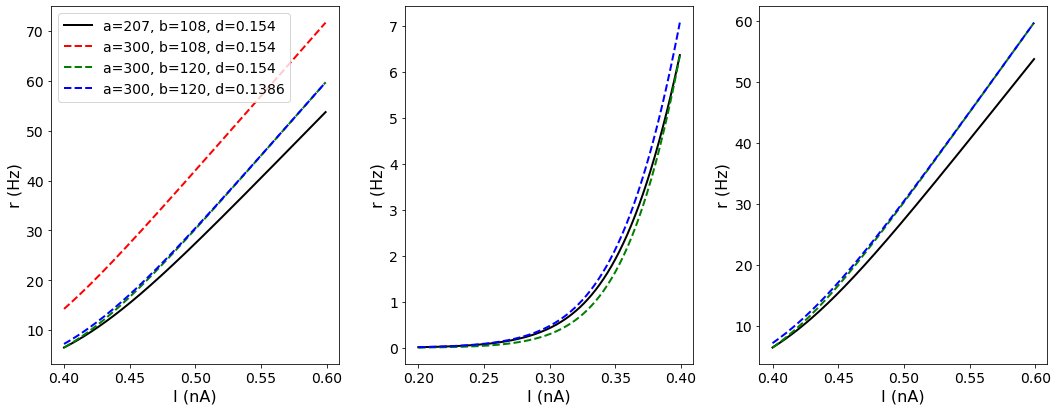

In [4]:
plt.figure(figsize=(15., 6))

plt.subplot(131)
I = np.arange(0.4, 0.6, 0.001)
plt.plot(I, F(I), 'k', label='a=207, b=108, d=0.154')
A = 300
B = 108 * 300/270
D = 0.154*270 / 300
print(A, B, D)
plt.plot(I, F(I, a=A), 'r--', label='a=300, b=108, d=0.154')
plt.plot(I, F(I, a=A, b=B), 'g--', label='a=300, b=120, d=0.154')
plt.plot(I, F(I, a=A, b=B, d=D), 'b--', label='a=300, b=120, d=0.1386')
plt.xlabel('I (nA)')
plt.ylabel('r (Hz)')
plt.legend()

plt.subplot(132)
I = np.arange(0.2, 0.4, 0.001)
plt.plot(I, F(I), 'k', label='a=207, b=108, d=0.154')
plt.plot(I, F(I, a=A, b=B), 'g--', label='a=300, b=120, d=0.154')
plt.plot(I, F(I, a=A, b=B, d=D), 'b--', label='a=300, b=120, d=0.386')
plt.xlabel('I (nA)')
plt.ylabel('r (Hz)')

plt.subplot(133)
I = np.arange(0.4, 0.6, 0.001)
plt.plot(I, F(I), 'k', label='a=207, b=108, d=0.154')
plt.plot(I, F(I, a=A, b=B), 'g--', label='a=300, b=120, d=0.154')
plt.plot(I, F(I, a=A, b=B, d=D), 'b--', label='a=300, b=120, d=0.1386')
plt.xlabel('I (nA)')
plt.ylabel('r (Hz)')

plt.tight_layout()

plt.show()

### Main simulation code
`res = run_sim(pars, verbose=False)`

In [5]:
def run_sim(pars, verbose=False):
    '''
    Run simulation, for multiple trials.
    
    Parameters:
    pars : circuit model parameters
    
    Return: dictionary with activity traces
    '''
    # retivial parameters
    ### gain variables ###
    a, b, d = pars['a'], pars['b'], pars['d']
    
    ### synaptic parameters ###
    tauS, gamma = pars['tauS'], pars['gamma']

    ### Connection strength ###
    JE, JI = pars['JE'], pars['JI']
    
    ### background input####
    Ib1, Ib2 = pars['Ib1'], pars['Ib2']
    ### OU background noise ###
    tau0, sigma, myseed = pars['tau0'], pars['sigma'], pars['myseed']

    ### simulation parameters ###
    T, dt, dt_smooth = pars['T'], pars['dt'], pars['dt_smooth']
    s1_init, s2_init = pars['s1_init'], pars['s2_init']
    
    ### Stimulus Parameters ###
    Jext, mu1, mu2 = pars['Jext'], pars['mu1'], pars['mu2']
    Ntrials, Tstim, Tdur = pars['Ntrials'], pars['Tstim'], pars['Tdur']
    
    range_t = pars['range_t']
    NT = len(range_t)
    
    # Make lists to store firing rate (r) and gating variable (s)
    S1_traj = []  
    S2_traj = []
    r1_traj = []  
    r2_traj = []
    r1smooth_traj = []  
    r2smooth_traj = []
    
    verb_trial = max(int(Ntrials/10), 1)
    
    for i in range(Ntrials): #Loop through trials

        if verbose and (i % verb_trial == 0):
            print("trial # ", i+1, 'of', Ntrials)

        #Set random seed
#         np.random.seed(i)
        gwn = np.random.randn(NT, 2)

        #Initialize
        r1smooth = []
        r2smooth = []
        
        Ieta1 = np.zeros(NT+1)
        Ieta2 = np.zeros(NT+1)
        S1 = np.zeros(NT+1)
        S2 = np.zeros(NT+1)
        r1 = np.zeros(NT)
        r2 = np.zeros(NT)
        
        # Initialize S1, S2
        S1[0], S2[0] = s1_init, s2_init
        
        for t in range(NT): #Loop through time for a trial

            #---- Stimulus------------------------------------------------------
            Istim1 = ((Tstim/dt < t) & (t<(Tstim+Tdur)/dt)) * (Jext*mu1) # To population 1
            Istim2 = ((Tstim/dt < t) & (t<(Tstim+Tdur)/dt)) * (Jext*mu2) # To population 2
                 
            # Total synaptic input
            Isyn1 = JE*S1[t] + JI*S2[t] + Istim1 + Ieta1[t]
            Isyn2 = JI*S1[t] + JE*S2[t] + Istim2 + Ieta2[t]
            
            # Transfer function to get firing rate
            r1[t]  = F(Isyn1, a, b, d)
            r2[t]  = F(Isyn2, a, b, d)
        
            #---- Dynamical equations -------------------------------------------

            # Mean NMDA-mediated synaptic dynamics updating
            S1[t+1] = S1[t] + dt*(-S1[t]/tauS + (1-S1[t])*gamma*r1[t]);
            S2[t+1] = S2[t] + dt*(-S2[t]/tauS + (1-S2[t])*gamma*r2[t]);

            # Ornstein-Uhlenbeck generation of noise in pop1 and 2
            Ieta1[t+1] = Ieta1[t] + (dt/tau0) * (Ib1-Ieta1[t]) + np.sqrt(dt/tau0)*sigma*gwn[t, 0]
            Ieta2[t+1] = Ieta2[t] + (dt/tau0) * (Ib2-Ieta2[t]) + np.sqrt(dt/tau0)*sigma*gwn[t, 1]
        
        smooth_wind = int(dt_smooth/dt)
        
        r1smooth = np.array([np.mean(r1[j:j+smooth_wind]) for j in range(NT)])
        r2smooth = np.array([np.mean(r2[j:j+smooth_wind]) for j in range(NT)])
        
        S1_traj.append(S1)
        S2_traj.append(S2)
        r1_traj.append(r1)
        r2_traj.append(r2)
        r1smooth_traj.append(r1smooth)
        r2smooth_traj.append(r2smooth)
    
    z = {'S1':np.array(S1_traj), 'S2':np.array(S2_traj), # NMDA gating variables
         'r1':np.array(r1_traj), 'r2':np.array(r2_traj), # Firing rates
         'r1smooth':np.array(r1smooth_traj), 'r2smooth':np.array(r2smooth_traj), # smoothed firing rates
         't':range_t}

    return z

# Test for low certainty, informative case

Low certainty, cue input (carrying information) is important:
- large Reward Size (strong input) --> short reaction time
- small Reward Size (weak input) --> long reaction time

In [5]:
pars = default_pars()
pars['Ntrials']=10
# print(pars)

res  =  run_sim(pars, verbose=False)

pars['mu1'] = 10.
res2 =  run_sim(pars, verbose=False)

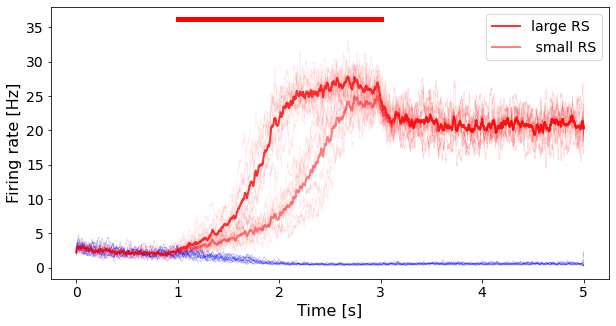

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(res['t'], res['r1smooth'][i, :], c='r', alpha=0.1, lw=0.5)
    plt.plot(res['t'], res['r2smooth'][i, :], c='b', alpha=0.3, lw=0.5)
    plt.plot(res2['t'], res2['r1smooth'][i, :], c='r', alpha=0.1, lw=0.5)
    
plt.plot(res['t'], res['r1smooth'].mean(axis=0),   c='r', alpha=0.8, label='large RS')
plt.plot(res2['t'], res2['r1smooth'].mean(axis=0), c='r', alpha=0.5, label=' small RS')
plot_y_max = max(res['r1smooth'].max(), res2['r1smooth'].max()) + 3    
plt.plot([pars['Tstim'], pars['Tstim']+pars['Tdur']], [plot_y_max, plot_y_max], 'r', lw=5)
plt.xlabel('Time [s]')
plt.ylabel('Firing rate [Hz]')
plt.legend()
plt.show()

In [7]:
pars = default_pars()
pars['Ntrials']=50
pars['a'] = 275
res3 =  run_sim(pars, verbose=False)

0.68


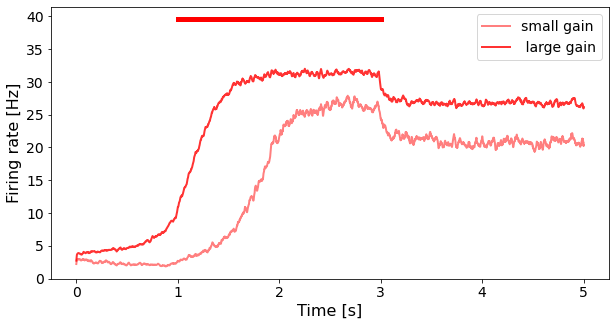

In [8]:
plt.figure(figsize=(10, 5))
# for i in range(pars['Ntrials']):
#     plt.plot(res['t'], res['r1smooth'][i, :], c='r', alpha=0.1, lw=0.5)
#     plt.plot(res['t'], res['r2smooth'][i, :], c='b', alpha=0.3, lw=0.5
#     plt.plot(res3['t'], res3['r1smooth'][i, :], c='r', alpha=0.1, lw=0.5)

trial_sel = res3['r1smooth'].max(axis=1)>15
print(sum(trial_sel)/50)
plt.plot(res['t'], res['r1smooth'].mean(axis=0),   c='r', alpha=0.5, label='small gain')
plt.plot(res3['t'], res3['r1smooth'][trial_sel].mean(axis=0), c='r', alpha=0.8, label=' large gain')
plot_y_max = max(res['r1smooth'].max(), res3['r1smooth'].max()) + 1    
plt.plot([pars['Tstim'], pars['Tstim']+pars['Tdur']], [plot_y_max, plot_y_max], 'r', lw=5)
plt.xlabel('Time [s]')
plt.ylabel('Firing rate [Hz]')
plt.legend()
plt.show()

In [9]:
pars = default_pars()
pars['Ntrials']=10
pars['JE'] = 0.2609 + 0.02
res4 =  run_sim(pars, verbose=False)

1.0


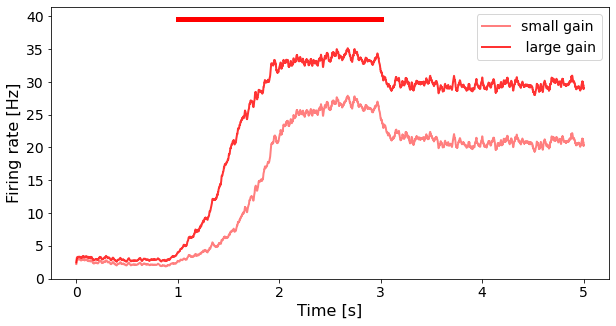

In [10]:
plt.figure(figsize=(10, 5))
# for i in range(pars['Ntrials']):
#     plt.plot(res['t'], res['r1smooth'][i, :], c='r', alpha=0.1, lw=0.5)
#     plt.plot(res['t'], res['r2smooth'][i, :], c='b', alpha=0.3, lw=0.5
#     plt.plot(res3['t'], res3['r1smooth'][i, :], c='r', alpha=0.1, lw=0.5)

trial_sel = res4['r1smooth'].max(axis=1)>15
print(sum(trial_sel)/10)
plt.plot(res['t'], res['r1smooth'].mean(axis=0),   c='r', alpha=0.5, label='small gain')
plt.plot(res4['t'], res4['r1smooth'][trial_sel].mean(axis=0), c='r', alpha=0.8, label=' large gain')
plot_y_max = max(res['r1smooth'].max(), res3['r1smooth'].max()) + 1    
plt.plot([pars['Tstim'], pars['Tstim']+pars['Tdur']], [plot_y_max, plot_y_max], 'r', lw=5)
plt.xlabel('Time [s]')
plt.ylabel('Firing rate [Hz]')
plt.legend()
plt.show()

# Test for High certainty, Uninformative case

High certainty, cue doesnt carry any inforamtion, the monkey can randomly choose one, (ACC remember stochasticity).

**What parameters can be manipulated to change the circuit stochasticity?**
- gain modulation
- coupling strength (plasticity)
- input noise for uncertainty, input for  excitability?

We can first consider these globally (from the discussion of their NN paper). 

### Nullcline of population $1$

Given meshgrid $I_1$, one can obtain

\begin{align}
S_1 &= \frac{\gamma F(I_1)}{\gamma F(I_1) + 1/\tau_S} \\[1.5mm]
S_2 &= \frac{I_1 -  J_{E} S_1 - I_{b1} - J_{\rm ext} \mu_1}{J_{I}}
\end{align}

In [9]:
def Nullcline_S1(pars, I1, fixed_range=True):
    """
    Obtain nullcline S1 from equation (3)
    """
    a, b, d = pars['a'], pars['b'], pars['d']
    JE, JI = pars['JE'], pars['JI']
    gamma, tauS = pars['gamma'], pars['tauS']
    Jext, mu1, Ib1 = pars['Jext'], pars['mu1'], pars['Ib1']
    S1 = gamma*F(I1, a, b, d) / (gamma*F(I1, a, b, d) + 1./tauS)
    S2 = (I1 - JE*S1 - Ib1 - Jext*mu1) / JI
    if fixed_range:
        id_range = (S2>=-0.0) &(S2<=1.2)
    else:
        id_range = S2<=1e5
    
    return S1[id_range], S2[id_range]

### Nullcline of population $2$

Given meshgrid $I_2$, one can obtain

\begin{align}
S_2 &= \frac{\gamma F(I_2)}{\gamma F(I_2) + 1/\tau_S} \\[1.5mm]
S_1 &= \frac{I_2 -  J_{E} S_2 - I_{b2} - J_{\rm ext}\mu_2}{J_{I}}
\end{align}


In [10]:
def Nullcline_S2(pars, I2, fixed_range=True):
    """
    Obtain nullcline S1 from equation (3)
    """
    a, b, d = pars['a'], pars['b'], pars['d']
    JE, JI = pars['JE'], pars['JI']
    gamma, tauS = pars['gamma'], pars['tauS']
    Jext, mu2, Ib2 = pars['Jext'], pars['mu2'], pars['Ib2']
    
    S2 = gamma*F(I2, a, b, d) / (gamma*F(I2, a, b, d) + 1./tauS)
    S1 = (I2 - JE*S2 - Ib2 - Jext*mu2) / JI
    if fixed_range:
        id_range = (S1>=-0.0) &(S1<=1.2)
    else:
        id_range = S1<=1e5
    
    return S1[id_range], S2[id_range]

### Time derivatives for S variables (dS/dt)

In [11]:
def Sderivs(S1, S2, pars):
    '''
    Time derivatives for S variables (dS/dt).
    '''
    a, b, d = pars['a'], pars['b'], pars['d']
    gamma, tauS = pars['gamma'], pars['tauS']
    JE, JI = pars['JE'], pars['JI']
    Ib1, Ib2 = pars['Ib1'], pars['Ib2']
    Jext, mu1, mu2 = pars['Jext'], pars['mu1'], pars['mu2']
    
    I1 = (JE*S1 + JI*S2) + Ib1 + mu1*Jext
    I2 = (JI*S1 + JE*S2) + Ib2 + mu2*Jext
    
    dS1dt = -S1/tauS + gamma*(1.0-S1)*F(I1, a, b, d)
    dS2dt = -S2/tauS + gamma*(1.0-S2)*F(I2, a, b, d)
    return dS1dt, dS2dt

In [12]:
def plot_phase_plane(pars, ax=None, myls='-', vec_flow=False):
    if ax is None:
        ax = plt.gca()
    I1_null = np.linspace(0, 1.0, 10000)
    S1_null_S1, S1_null_S2 = Nullcline_S1(pars, I1_null, fixed_range=True)

    I2_null = np.linspace(0, 1.0, 1000)
    S2_null_S1, S2_null_S2 = Nullcline_S2(pars, I2_null, fixed_range=True)

    plot_thres = 0.8
    plot_range = (S1_null_S1<plot_thres)&(S1_null_S2<plot_thres)
    ax.plot(S1_null_S1[plot_range], S1_null_S2[plot_range], 'r', ls=myls, label='S1 nullcline')
    plot_range = (S2_null_S1<plot_thres)&(S2_null_S2<plot_thres)
    ax.plot(S2_null_S1[plot_range], S2_null_S2[plot_range], 'b', ls=myls, label='S2 nullcline')

    if vec_flow:
        S_vec = np.linspace(0.001,0.999,200) # things break down at S=0 or S=1
        S1, S2 = np.meshgrid(S_vec,S_vec)
        dS1dt, dS2dt = Sderivs(S1, S2, pars)

        n_skip = 12
        ax.quiver(S1[::n_skip,::n_skip], S2[::n_skip,::n_skip], 
                   dS1dt[::n_skip,::n_skip], dS2dt[::n_skip,::n_skip], 
                   angles='xy', scale_units='xy', scale=40,facecolor='gray')
    
    ax.set_xlabel('$S_2$')
    ax.set_ylabel('$S_1$')
    ax.set_xlim([0, 0.8])
    ax.set_ylim([0, 0.8])
    ax.set_aspect('equal')
    ax.legend(loc='best')

### Gain modulation

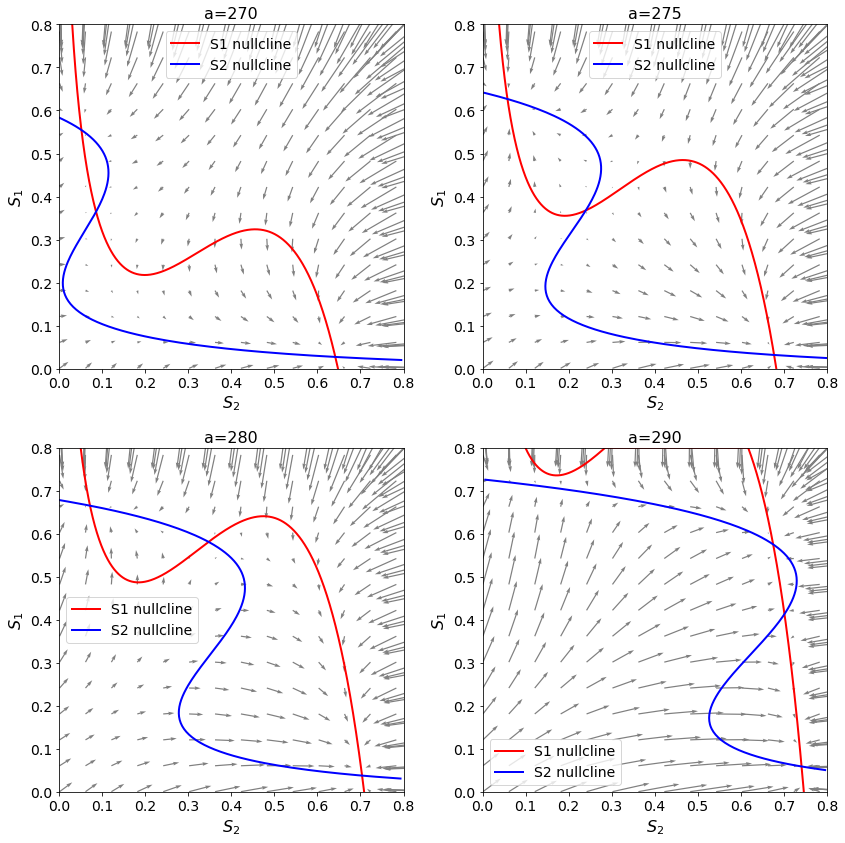

In [15]:
pars = default_pars()
pars['mu1'] = 20

# plt.figure(figsize=(6, 6))
# ax = plt.subplot(111)
# plot_phase_plane(pars, ax)

fig,axs = plt.subplots(2,2, figsize=(12, 12))
for ax,a in zip(axs.flat,[270, 275, 280, 290]):
    pars['a'] = a
    plot_phase_plane(pars, ax=ax, myls='-', vec_flow=True)
    ax.set_title('a={a}'.format(a=a))
    
plt.tight_layout()

Taking into account our dendritic disinhibition project, gain modulation + reducing mutual inhibition strength a little bit --> shift somatic inhibition to dendritic inhibition?

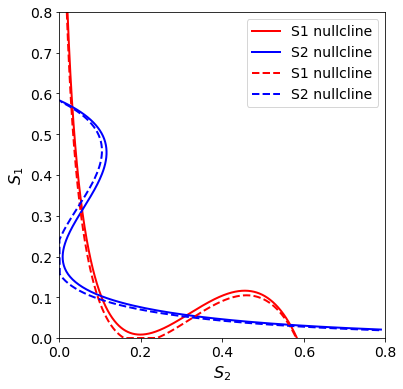

In [16]:
# fig,axs = plt.subplots(2,2, figsize=(12, 12))
# for ax, a, JI in zip(axs.flat, [268, 270, 272, 275], [-0.049, -0.0497, -0.1, -0.061]):
#     pars['a'] = a
#     pars['JI'] = JI
#     plot_phase_plane(pars, ax=ax, myls='-')
    
#     pars['a'] = 270
#     pars['JI'] = -0.0497
#     plot_phase_plane(pars, ax=ax, myls='--')
    
#     ax.set_title('(a, JI)=({a}, {JI})'.format(a=a, JI=JI))
    
# plt.tight_layout()

pars = default_pars()
pars['mu1'] = 0

plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
pars['a'] = 270
pars['JI'] = -0.049
plot_phase_plane(pars, ax=ax, myls='-')

pars['a'] = 272
pars['JI'] = -0.05
# pars['d'] = 0.156
pars['b'] = 109
plot_phase_plane(pars, ax=ax, myls='--')

#### One population nullcline

Given meshgrid $I_{\rm total}$ to Population A, one can obtain


\begin{align}
S_A &= \frac{\gamma F(I_{\rm total})}{\gamma F(I_{\rm total}) + 1/\tau_S} \\[1.5mm]
\end{align}

and 
$$I_{\rm total} = J_E S_A + I_{\rm ext}$$, so that

$$S_A = \frac{I_{\rm total} - I_{\rm ext}}{J_E}$$

Text(0, 0.5, '$S_1$')

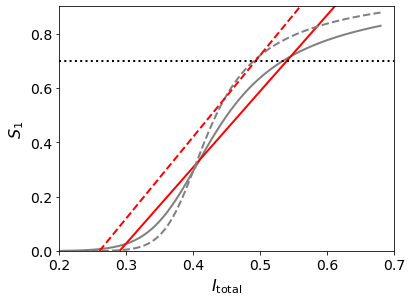

In [215]:
pars = default_pars()
pars['mu1'] = 0
I1_null = np.linspace(0, 1.0, 10000)
plt.figure(figsize=(6, 4.5))
pars['a'] = 270
S1_null_S1, _ = Nullcline_S1(pars, I1_null, fixed_range=False)
plot_range = (I1_null>0.1)&(I1_null<0.68)
plt.plot(I1_null[plot_range], S1_null_S1[plot_range], color=[0.5, 0.5, 0.5], clip_on=True)
plt.plot(np.array([0.28, 0.7]), (np.array([0.28, 0.7])-0.29)*2.8, 'r')

pars['a'] = 400
pars['b'] = 108/270 * pars['a']
# pars['d'] =0.154*270 / pars['a']
S1_null_S1, _ = Nullcline_S1(pars, I1_null, fixed_range=False)
plot_range = (I1_null>0.1)&(I1_null<0.68)
plt.plot(I1_null[plot_range], S1_null_S1[plot_range], color=[0.5, 0.5, 0.5], ls='--', clip_on=True)
plt.plot(np.array([0.24, 0.7]), (np.array([0.24, 0.7])-0.26)*3.0, 'r--')
plt.axhline(0.7, 0, 1, color='k', ls=':')

plt.xlim(0.2, 0.7)
plt.ylim(0, 0.9)
plt.xlabel(r'$I_{\mathrm{total}}$')
plt.ylabel(r'$S_1$')

### Coupling strength JE increase

In [18]:
pars = default_pars()
pars['mu1'] = 0
print(pars['JE'])

0.2609


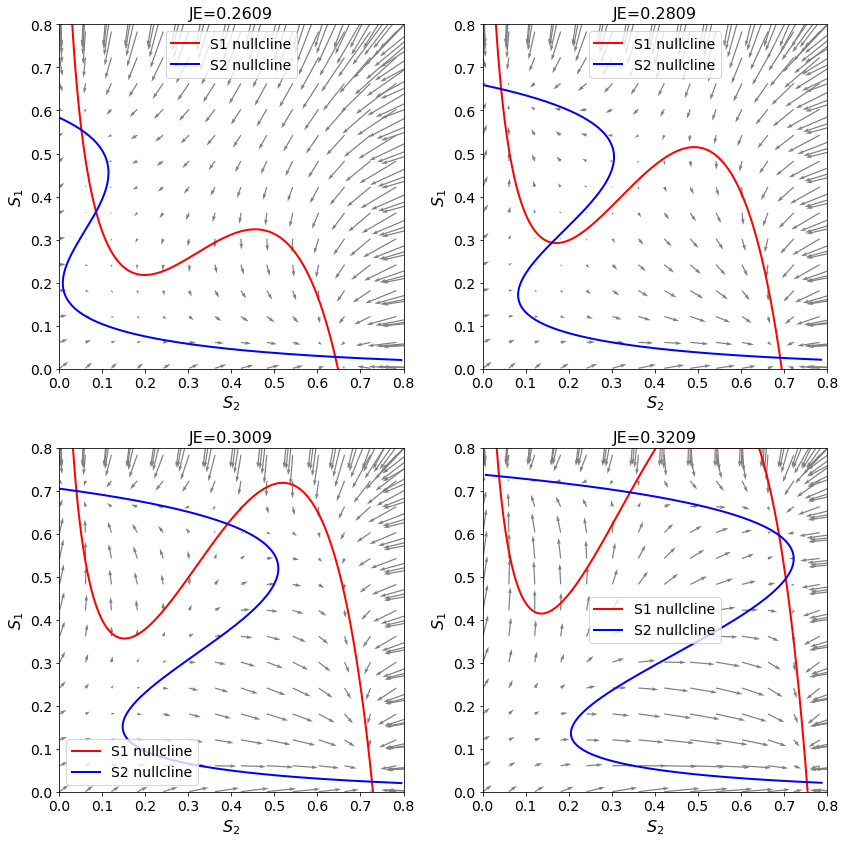

In [19]:
pars = default_pars()
pars['mu1'] = 20

# plt.figure(figsize=(6, 6))
# ax = plt.subplot(111)
# plot_phase_plane(pars, ax)

fig,axs = plt.subplots(2,2, figsize=(12, 12))
for ax, JE in zip(axs.flat,[0.2609, 0.2809, 0.3009, 0.3209]):
    pars['JE'] = JE
    plot_phase_plane(pars, ax=ax, myls='-', vec_flow=True)
    ax.set_title('JE={JE}'.format(JE = JE))
    
plt.tight_layout()

### Noise of OU, directly increase uncertainty

In [20]:
pars = default_pars()
pars['Ntrials']=10
pars['mu1'] = 0.
pars['sigma'] = 0.04

res =  run_sim(pars, verbose=False)

Text(0, 0.5, 'Firing rate [Hz] (r1, -r2)')

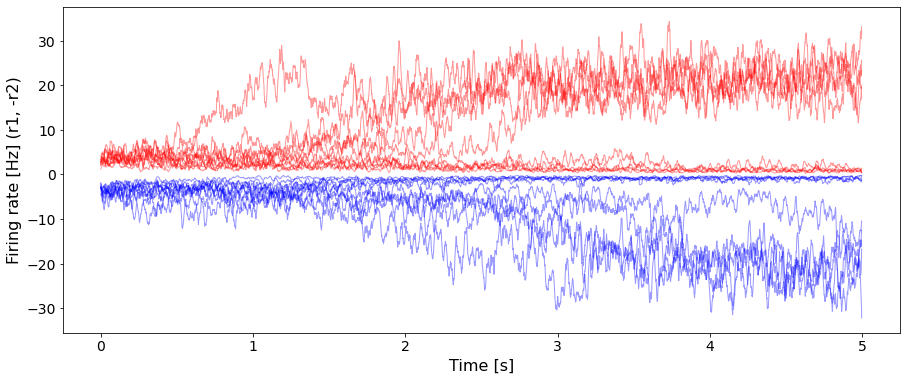

In [21]:
plt.figure(figsize=(15, 6))
for i in range(pars['Ntrials']):
    plt.plot(res['t'][:-10], res['r1smooth'][i, :-10], c='r', alpha=0.4, lw=1.0)
    plt.plot(res['t'][:-10], -res['r2smooth'][i, :-10], c='b', alpha=0.4, lw=1.0)
    
# plt.plot(res['t'], res['r1smooth'].mean(axis=0), c='r', alpha=0.8)
plt.xlabel('Time [s]')
plt.ylabel('Firing rate [Hz] (r1, -r2)')

# Comparison of different mechanisms

## Gain modulation

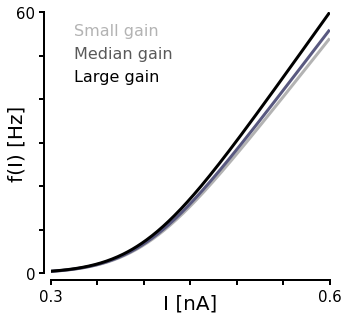

In [475]:
fig1 = plt.figure(figsize=(5., 4.8))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
I = np.arange(0.3, 0.6, 0.001)
ax.plot(I, F(I), c=[0.7, 0.7, 0.7], lw=3., label='Small gain')
A = 280
B = 108 * 280/270
D = 0.154*270 / 280
ax.plot(I, F(I, a=A, b=B, d=D), color=[0.35, 0.35, 0.5], lw=3., label='Median gain')
A = 300
B = 108 * 300/270
D = 0.154*270 / 300
ax.plot(I, F(I, a=A, b=B, d=D), 'k', lw=3., label='Large gain')
ax.set_xlabel('I [nA]', fontsize=20, labelpad=-10)
ax.set_ylabel('f(I) [Hz]', fontsize=20, labelpad=-10)

legend = ax.legend(loc=(-0.1, 0.7), fontsize=16, frameon=False)
for color, text, item in zip([[0.7, 0.7, 0.7], [0.35, 0.35, 0.35], [0.0, 0.0, 0.0]], legend.get_texts(), legend.legendHandles):
    text.set_color(color)
    item.set_visible(False)
    
ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0.3, 0.6])
ax.set_xticks([0.3, 0.6])
ax.set_xticklabels([0.3, 0.6], fontsize=15)
minorLocator = MultipleLocator(0.05)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, 60])
ax.set_yticks([0, 60])
ax.set_yticklabels([0, 60], fontsize=15)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)

# fig1.savefig('FIgures/fI_curve.pdf', bbox_inches = "tight")

In [70]:
# pars = default_pars()
# pars['mu1'] = 0
# plt.figure(figsize=(6, 6))

# ax = plt.subplot(111)
# pars['a'], pars['b'], pars['d'] = 270., 108., 0.154
# pars['JI'] = -0.0497
# pars['Ib1'], pars['Ib2'] = 0.3255, 0.3255
# plot_phase_plane(pars, ax)

# pars['a']  = 280.
# pars['b']  = 108. * pars['a']/270. #+1.
# # pars['d']  = 0.154*270/pars['a']*0.935
# pars['JI'] = -0.0497*1.62
# Ib_factor = 1.0 # 0.996
# pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor
# plot_phase_plane(pars, ax, myls='--')

In [478]:
pars = default_pars()
pars['Ntrials']=100
pars['mu1'] = 8.2

# small gain
pars['a'] = 270.
pars['b'] = 108. * pars['a']/270.
pars['d'] = 0.154*270 / pars['a']
print(pars['a'], pars['b'], pars['d'])
res1 = run_sim(pars, verbose=False)

# mid gain
pars['a'] = 280.
pars['b']  = 108. * pars['a']/270.
pars['d'] = 0.154*270 / pars['a']
print(pars['a'], pars['b'], pars['d'])
res2 = run_sim(pars, verbose=False)

# large gain
pars['a'] = 320.
pars['b']  = 108. * pars['a']/270.
pars['d'] = 0.154*270 / pars['a']
print(pars['a'], pars['b'], pars['d'])
res3 = run_sim(pars, verbose=False)

270.0 108.0 0.154
280.0 112.0 0.1485
320.0 128.0 0.12993749999999998


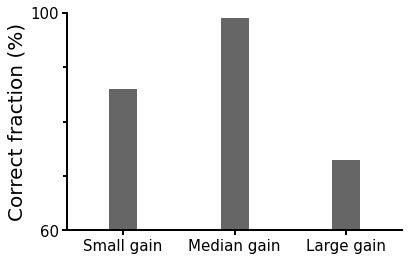

In [480]:
# id1 = res1['r1smooth'].max(axis=1)>12
# id2 = res2['r1smooth'].max(axis=1)>12
# id3 = res3['r1smooth'].max(axis=1)>12
# corr_gain = np.array([sum(id1), sum(id2), sum(id3)])

fig1 = plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.bar(np.array([0.8, 1.6, 2.4]), corr_gain, width=0.2, color=[0.4, 0.4, 0.4])
plt.ylabel('Correct fraction (%)', fontsize=20)
plt.xlim([0.4, 2.8])
plt.xticks(ticks=[0.8, 1.6, 2.4], labels=['Small gain', 'Median gain', 'Large gain'], fontsize=15)

ax.set_ylim([60, 100])
ax.set_yticks([60, 100])
ax.set_yticklabels([60, 100], fontsize=15)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

# fig1.savefig('Figures/gian_mod_corrChoice_fraction.pdf', bbox_inches = "tight")

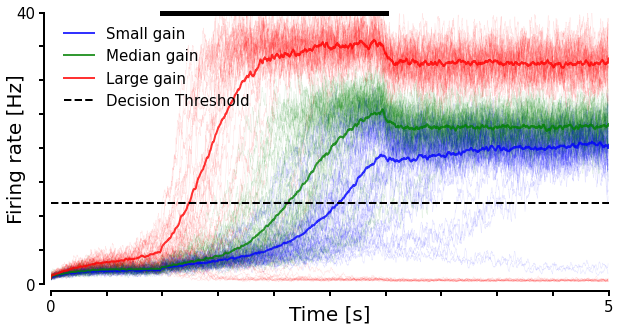

In [481]:
fig1 = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
for i in np.arange(pars['Ntrials'])[::2]:
    plt.plot(res1['t'][:-10], res1['r1smooth'][i, :-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:-10], res2['r1smooth'][i, :-10], c='g', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:-10], res3['r1smooth'][i, :-10], c='r', alpha=.1, lw=0.5)

id1 = res1['r1smooth'].max(axis=1)>12
id2 = res2['r1smooth'].max(axis=1)>12
id3 = res3['r1smooth'].max(axis=1)>12
plt.plot(res1['t'], res1['r1smooth'][id1].mean(axis=0),  c='b', alpha=0.8, label= 'Small gain')
plt.plot(res2['t'], res2['r1smooth'][id2].mean(axis=0),  c='g', alpha=0.8, label= 'Median gain')
plt.plot(res3['t'], res3['r1smooth'][id3].mean(axis=0),  c='r', alpha=0.8, label= 'Large gain')
plot_y_max = 40   
plt.plot([pars['Tstim'], pars['Tstim']+pars['Tdur']], [plot_y_max, plot_y_max], 'k', lw=5, clip_on=False)
plt.axhline(12, 0, 1, color='k', ls='--', label='Decision Threshold')
plt.xlabel('Time [s]', fontsize=20, labelpad=-10)
plt.ylabel('Firing rate [Hz]', fontsize=20, labelpad=-10)
plt.legend(loc='upper left', fontsize=15, frameon=False)

ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0, 5])
ax.set_xticks([0, 5])
ax.set_xticklabels([0, 5], fontsize=15)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, 40])
ax.set_yticks([0, 40])
ax.set_yticklabels([0, 40], fontsize=15)
minorLocator = MultipleLocator(5)
ax.yaxis.set_minor_locator(minorLocator)

plt.show()

# fig1.savefig('Figures/gian_mod_trace.pdf', bbox_inches = "tight")

In [482]:
r_att_gain = np.array([np.max(res1['r1smooth'][id1].mean(axis=0)),
                       np.max(res2['r1smooth'][id2].mean(axis=0)),
                       np.max(res3['r1smooth'][id3].mean(axis=0))])

t_rec_gain = np.array([pars['range_t'][res1['r1smooth'][id1].mean(axis=0)>12][0]-1,
                       pars['range_t'][res2['r1smooth'][id2].mean(axis=0)>12][0]-1,
                       pars['range_t'][res3['r1smooth'][id3].mean(axis=0)>12][0]-1])

r_att_gain, t_rec_gain

(array([20.99125032, 25.75006469, 35.99148415]),
 array([1.5755, 1.1275, 0.2375]))

In [483]:
pars = default_pars()
pars['Ntrials']= 1
pars['mu1']    = 0.
pars['sigma']  = 0.
# print(pars)

# small gain
pars['a'] = 270.
pars['b'] = 108. * pars['a']/270.
pars['d'] = 0.154*270 / pars['a']
res1 = run_sim(pars, verbose=False)

# mid gain
pars['a'] = 280.
pars['b'] = 108. * pars['a']/270.
pars['d'] = 0.154*270 / pars['a']
res2 = run_sim(pars, verbose=False)

# large gain
pars['a'] = 300.
pars['b'] = 108. * pars['a']/270.
pars['d'] = 0.154*270 / pars['a']
res3 = run_sim(pars, verbose=False)

r_base_gain = np.array([res1['r1smooth'][:, -1].mean(), res2['r1smooth'][:, -1].mean(), res3['r1smooth'][:, -1].mean()])

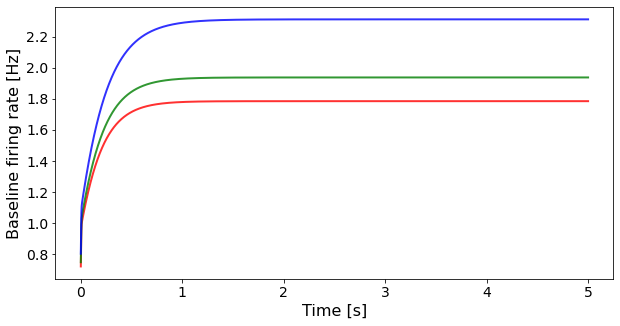

In [484]:
plt.figure(figsize=(10, 5))

for i in np.arange(pars['Ntrials']):
    plt.plot(res1['t'][:10:-10], res1['r1smooth'][i, :10:-10], c='r', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:10:-10], res2['r1smooth'][i, :10:-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:10:-10], res3['r1smooth'][i, :10:-10], c='g', alpha=.1, lw=0.5)

plt.plot(res1['t'], res1['r1smooth'].mean(axis=0),  c='r', alpha=0.8, label='small gain')
plt.plot(res2['t'], res2['r1smooth'].mean(axis=0),  c='g', alpha=0.8, label='mid gain')
plt.plot(res3['t'], res3['r1smooth'].mean(axis=0),  c='b', alpha=0.8, label='large gain')
plt.xlabel('Time [s]')
plt.ylabel('Baseline firing rate [Hz]')
# plt.ylim([1, 4])
# plt.legend()
plt.show()

In [181]:
t_rec_gain[2] = 0.3245*1.4

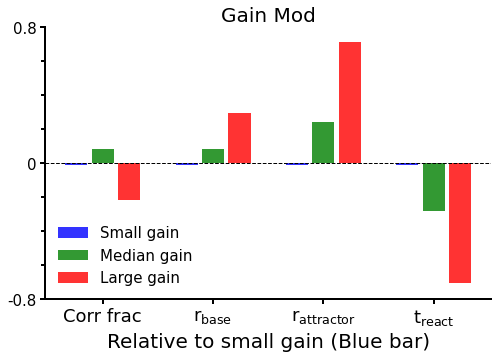

In [486]:
# res_gain = np.vstack((corr_gain, r_base_gain, r_att_gain, t_rec_gain))

fig1 = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.bar(np.arange(4)-0.24, res_gain[:, 0]/res_gain[:, 0]-1+0.005, width=0.2, color='b', alpha=0.8, label='Small gain', zorder=2)
plt.bar(np.arange(4)-0.24, res_gain[:, 0]/res_gain[:, 0]-1-0.01, width=0.2, color='b', alpha=0.8, zorder=2)
plt.bar(np.arange(4),      res_gain[:, 1]/res_gain[:, 0]-1, width=0.2, color='g', alpha=0.8, label='Median gain')
plt.bar(np.arange(4)+0.24, res_gain[:, 2]/res_gain[:, 0]-1, width=0.2, color='r', alpha=0.8, label='Large gain')

plt.axhline(0, 0, 1, color='k', ls='--', lw=1.)
# plt.xlim([-0.5, 3.5])
# plt.ylim([0.2, 1.4])
plt.xticks(ticks=[0., 1., 2, 3], labels=['Corr frac', r'r$_{\mathrm{base}}$', r'r$_{\mathrm{attractor}}$', r't$_\mathrm{react}$'], fontsize=18)
plt.xlabel('Relative to small gain (Blue bar)', fontsize=20, labelpad=5)
plt.title('Gain Mod', fontsize=20)
plt.legend(loc='lower left', fontsize=15, frameon=False)

ax.set_ylim([-0.8, 0.8])
ax.set_yticks([-0.8, 0, 0.8])
ax.set_yticklabels([-0.8, 0, 0.8], fontsize=15)
minorLocator = MultipleLocator(0.2)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

# fig1.savefig('Figures/gian_mod_summary.pdf', bbox_inches = "tight")

In [487]:
pars = default_pars()
pars['Ntrials']= 100
pars['mu1']    = 8.2
# pars['sigma']  = 0.
# print(pars)

# large gain
pars['a'] = 320.
pars['b'] = 108. * pars['a']/270.
pars['d'] = 0.154*270 / pars['a']
res = run_sim(pars, verbose=False)

In [489]:
fig1 = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

for i in np.arange(pars['Ntrials'])[:]:
    plt.plot(res['t'][:10:-10]-0.2, res['r1smooth'][i, :10:-10], c='r', alpha=.1, lw=0.5)

plt.plot(res['t']-0.2, res['r1smooth'].mean(axis=0),  c='r', alpha=0.8, lw=3, label='super large Ib')
plot_y_max = 45   
plt.plot([pars['Tstim']+0.01, pars['Tstim']+pars['Tdur']-0.015], [plot_y_max, plot_y_max], 'k', lw=5, clip_on=False)
plt.xlabel('Time [s]', fontsize=20, labelpad=-5)
plt.ylabel('Firing rate [Hz]', fontsize=20, labelpad=-10)
plt.axhline(12, 0, 1, color='k', ls='--', label='Decision Threshold')
plt.axvline(pars['Tstim'], 0, 1, color='k', ls=':')
plt.axvline(pars['Tstim']+pars['Tdur']+0.0, 0, 1, color='k', ls=':')

ax.text(pars['Tstim'], -3, 'Stim On', color='k', fontsize=12,
            horizontalalignment='center', verticalalignment='center')
ax.text(pars['Tstim']+pars['Tdur'], -3, 'Stim Off', color='k', fontsize=12,
            horizontalalignment='center', verticalalignment='center')

ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0, 5])
ax.set_xticks([0, 5])
ax.set_xticklabels([0, 5], fontsize=15)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, 45])
ax.set_yticks([0, 45])
ax.set_yticklabels([0, 45], fontsize=15)
minorLocator = MultipleLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
plt.show()

# fig1.savefig('Figures/gian_mod_trace_preStim-decision.pdf', bbox_inches = "tight")

## Increase background input into either population

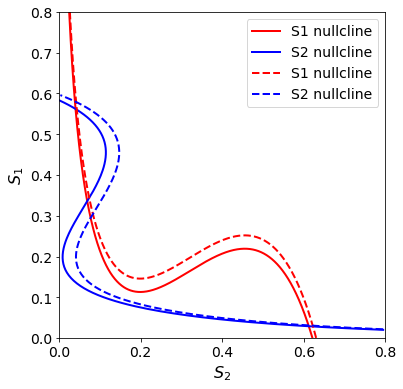

In [76]:
pars = default_pars()
pars['mu1'] = 8.2
plt.figure(figsize=(6, 6))

ax = plt.subplot(111)
pars['Ib1'], pars['Ib2'] = 0.3255, 0.3255
plot_phase_plane(pars, ax)

# Ib_factor = 0.995
# pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor
# plot_phase_plane(pars, ax, myls=':')

Ib_factor = 1.005
pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor
plot_phase_plane(pars, ax, myls='--')

In [461]:
pars = default_pars()
pars['Ntrials']=100
pars['mu1'] = 8.2

# small Ib
Ib_factor = 1.
pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor
print(pars['Ib1'], pars['Ib2'], pars['mu1'])
res1 = run_sim(pars, verbose=False)


# mid Ib
Ib_factor = 1.01
pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor
print(pars['Ib1'], pars['Ib2'], pars['mu1'])
res2 = run_sim(pars, verbose=False)

# strong Ib
Ib_factor = 1.025
pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor
print(pars['Ib1'], pars['Ib2'], pars['mu1'])
res3 = run_sim(pars, verbose=False)

0.3255 0.3255 8.2
0.328755 0.328755 8.2
0.3336375 0.3336375 8.2


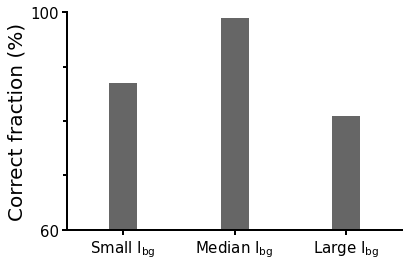

In [463]:
id1 = res1['r1smooth'].max(axis=1)>12
id2 = res2['r1smooth'].max(axis=1)>12
id3 = res3['r1smooth'].max(axis=1)>12
corr_Ib = np.array([sum(id1), sum(id2), sum(id3)])

fig1 = plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.bar(np.array([0.8, 1.6, 2.4]), corr_Ib, width=0.2, color=[0.4, 0.4, 0.4])
plt.ylabel('Correct fraction (%)', fontsize=20)
plt.xlim([0.4, 2.8])
plt.xticks(ticks=[0.8, 1.6, 2.4], labels=[r'Small I$_{\mathrm{bg}}$', r'Median I$_{\mathrm{bg}}$', r'Large I$_{\mathrm{bg}}$'], fontsize=15)

ax.set_ylim([60, 100])
ax.set_yticks([60, 100])
ax.set_yticklabels([60, 100], fontsize=15)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

fig1.savefig('Figures/Ib_mod_corrChoice_fraction.pdf', bbox_inches = "tight")

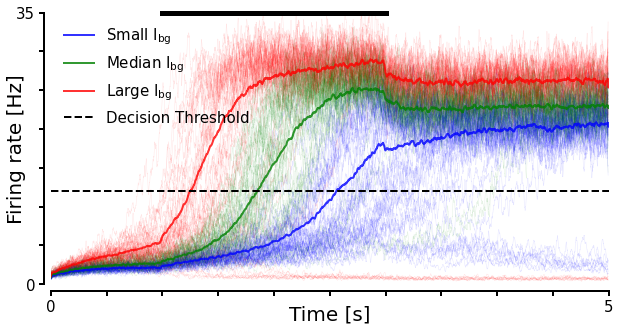

In [465]:
fig1 = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
for i in np.arange(pars['Ntrials'])[::2]:
    plt.plot(res1['t'][:-10], res1['r1smooth'][i, :-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:-10], res2['r1smooth'][i, :-10], c='g', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:-10], res3['r1smooth'][i, :-10], c='r', alpha=.1, lw=0.5)

id1 = res1['r1smooth'].max(axis=1)>12
id2 = res2['r1smooth'].max(axis=1)>12
id3 = res3['r1smooth'].max(axis=1)>12
plt.plot(res1['t'], res1['r1smooth'][id1].mean(axis=0),  c='b', alpha=0.8, label= r'Small I$_\mathrm{bg}$')
plt.plot(res2['t'], res2['r1smooth'][id2].mean(axis=0),  c='g', alpha=0.8, label= r'Median I$_\mathrm{bg}$')
plt.plot(res3['t'], res3['r1smooth'][id3].mean(axis=0),  c='r', alpha=0.8, label= r'Large I$_\mathrm{bg}$')
plot_y_max = 35   
plt.plot([pars['Tstim'], pars['Tstim']+pars['Tdur']], [plot_y_max, plot_y_max], 'k', lw=5, clip_on=False)
plt.axhline(12, 0, 1, color='k', ls='--', label='Decision Threshold')
plt.xlabel('Time [s]', fontsize=20, labelpad=-10)
plt.ylabel('Firing rate [Hz]', fontsize=20, labelpad=-10)
plt.legend(loc='upper left', fontsize=15, frameon=False)

ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0, 5])
ax.set_xticks([0, 5])
ax.set_xticklabels([0, 5], fontsize=15)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, 35])
ax.set_yticks([0, 35])
ax.set_yticklabels([0, 35], fontsize=15)
minorLocator = MultipleLocator(5)
ax.yaxis.set_minor_locator(minorLocator)

plt.show()

fig1.savefig('Figures/Ib_mod_trace.pdf', bbox_inches = "tight")

In [466]:
r_att_Ib = np.array([np.max(res1['r1smooth'][id1, :].mean(axis=0)),
                     np.max(res2['r1smooth'][id2, :].mean(axis=0)),
                     np.max(res3['r1smooth'][id3, :].mean(axis=0))])

t_rec_Ib = np.array([pars['range_t'][res1['r1smooth'][id1, :].mean(axis=0)>12][0]-1,
                     pars['range_t'][res2['r1smooth'][id2, :].mean(axis=0)>12][0]-1,
                     pars['range_t'][res3['r1smooth'][id3, :].mean(axis=0)>12][0]-1])

r_att_Ib, t_rec_Ib

(array([20.88164243, 25.30603421, 28.93838251]),
 array([1.559 , 0.8535, 0.2505]))

In [467]:
pars = default_pars()
pars['Ntrials']= 1
pars['mu1']    = 0.
pars['sigma']  = 0.
# print(pars)

# small Ib
Ib_factor = 1.0
pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor
res1 = run_sim(pars, verbose=False)

# mid Ib
Ib_factor = 1.01
pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor
res2 = run_sim(pars, verbose=False)

# large Ib
Ib_factor = 1.025
pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor
res3 = run_sim(pars, verbose=False)

r_base_Ib = np.array([res1['r1smooth'][:, -1].mean(), res2['r1smooth'][:, -1].mean(), res3['r1smooth'][:, -1].mean()])

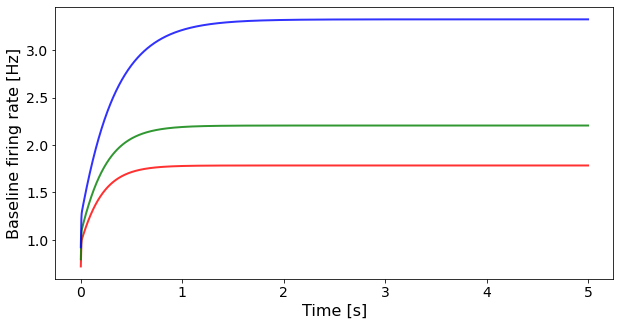

In [468]:
plt.figure(figsize=(10, 5))

for i in np.arange(pars['Ntrials']):
    plt.plot(res1['t'][:10:-10], res1['r1smooth'][i, :10:-10], c='r', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:10:-10], res2['r1smooth'][i, :10:-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:10:-10], res3['r1smooth'][i, :10:-10], c='g', alpha=.1, lw=0.5)

plt.plot(res1['t'], res1['r1smooth'].mean(axis=0),  c='r', alpha=0.8, label='small Ib')
plt.plot(res2['t'], res2['r1smooth'].mean(axis=0),  c='g', alpha=0.8, label='mid Ib')
plt.plot(res3['t'], res3['r1smooth'].mean(axis=0),  c='b', alpha=0.8, label='large Ib')
plt.xlabel('Time [s]')
plt.ylabel('Baseline firing rate [Hz]')
# plt.ylim([1, 4])
# plt.legend()
plt.show()

In [469]:
t_rec_Ib[2] = 0.242*1.5

In [494]:
res_Ib = np.vstack((corr_Ib, r_base_Ib, r_att_Ib, t_rec_Ib))

fig1 = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.bar(np.arange(4)-0.24, res_Ib[:, 0]/res_Ib[:, 0]-1+0.008, width=0.2, color='b', alpha=0.8, label=r'Small I$_\mathrm{bg}$', zorder=2)
plt.bar(np.arange(4)-0.24, res_Ib[:, 0]/res_Ib[:, 0]-1-0.01, width=0.2, color='b', alpha=0.8, zorder=2)
plt.bar(np.arange(4),      res_Ib[:, 1]/res_Ib[:, 0]-1, width=0.2, color='g', alpha=0.8, label=r'Median I$_\mathrm{bg}$')
plt.bar(np.arange(4)+0.24, res_Ib[:, 2]/res_Ib[:, 0]-1, width=0.2, color='r', alpha=0.8, label=r'Large I$_\mathrm{bg}$')

plt.axhline(0, 0, 1, color='k', ls='--', lw=1.)
# plt.xlim([-0.5, 3.5])
# plt.ylim([0.2, 1.4])
plt.xticks(ticks=[0., 1., 2, 3], labels=['Corr frac', r'r$_{\mathrm{base}}$', r'r$_{\mathrm{attractor}}$', r't$_\mathrm{react}$'], fontsize=18)
plt.xlabel('Relative to small case (Blue bar)', fontsize=20, labelpad=5)
# plt.title(r'$\it{\mathrm{I}_\mathrm{bg}}$ Mod', fontsize=20)
plt.title(r'$\it{I_{bg}}$ Mod', fontsize=20)
plt.legend(loc=(0, -0.0), fontsize=15, frameon=False)

ax.set_ylim([-0.8, 0.8])
ax.set_yticks([-0.8, 0, 0.8])
ax.set_yticklabels([-0.8, 0, 0.8], fontsize=15)
minorLocator = MultipleLocator(0.2)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

# fig1.savefig('Figures/Ib_mod_summary.pdf', bbox_inches = "tight")

In [472]:
pars = default_pars()
pars['Ntrials']= 100
pars['mu1']    = 8.2
# pars['sigma']  = 0.
# print(pars)

# small Ib
Ib_factor = 1.03
pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor
res = run_sim(pars, verbose=False)

In [474]:
fig1 = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

for i in np.arange(pars['Ntrials'])[:]:
    plt.plot(res['t'][:10:-10]-0.2, res['r1smooth'][i, :10:-10], c='r', alpha=.1, lw=0.5)

plt.plot(res['t']-0.2, res['r1smooth'].mean(axis=0),  c='r', alpha=0.8, lw=3, label='super large Ib')
plot_y_max = 35   
plt.plot([pars['Tstim']+0.01, pars['Tstim']+pars['Tdur']-0.015], [plot_y_max, plot_y_max], 'k', lw=5, clip_on=False)
plt.xlabel('Time [s]', fontsize=20, labelpad=0)
plt.ylabel('Firing rate [Hz]', fontsize=20, labelpad=-10)
plt.axhline(12, 0, 1, color='k', ls='--', label='Decision Threshold')
plt.axvline(pars['Tstim'], 0, 1, color='k', ls=':')
plt.axvline(pars['Tstim']+pars['Tdur']+0.0, 0, 1, color='k', ls=':')

ax.text(pars['Tstim'], -3, 'Stim On', color='k', fontsize=12,
            horizontalalignment='center', verticalalignment='center')
ax.text(pars['Tstim']+pars['Tdur'], -3, 'Stim Off', color='k', fontsize=12,
            horizontalalignment='center', verticalalignment='center')

ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0, 5])
ax.set_xticks([0, 5])
ax.set_xticklabels([0, 5], fontsize=15)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, 35])
ax.set_yticks([0, 35])
ax.set_yticklabels([0, 35], fontsize=15)
minorLocator = MultipleLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
plt.show()

fig1.savefig('Figures/Ib_mod_trace_preStim-decision.pdf', bbox_inches = "tight")

## Reducing $J_{\rm I}$

Uncertainty makes the neurons corresponding to the target position reduce their firing rate, then reduce the lateral inhibition to choice neurons

In [65]:
# pars['mu1'] = 0
# plt.figure(figsize=(12, 6))

# ax = plt.subplot(121)
# pars['JI']  = -0.0497
# plot_phase_plane(pars, ax)
# plt.title(r'$J_I$ = ' + str(pars['JI']), fontweight='bold')

# ax = plt.subplot(122)
# pars['JI']  = -0.0497*0.5
# plot_phase_plane(pars, ax)
# plt.title(r'$J_I$ = ' + str(pars['JI']), fontweight='bold')

pars = default_pars()
pars['mu1'] = 0
plt.figure(figsize=(6, 6))

ax = plt.subplot(111)
pars['JI']  = -0.0497
plot_phase_plane(pars, ax)

pars['JI']  = -0.0497*0.5
plot_phase_plane(pars, ax, myls='--')



In [325]:
pars = default_pars()
pars['Ntrials']=100
pars['mu1'] = 8.2

# strong J_I
print(pars['JI'], pars['mu1'])
res1 = run_sim(pars, verbose=False)

# mid J_I
pars['JI']  = -0.0497*0.8
print(pars['JI'], pars['mu1'])
res2 = run_sim(pars, verbose=False)

# weak J_I
pars['JI']  = -0.0497*0.4
print(pars['JI'], pars['mu1'])
res3 = run_sim(pars, verbose=False)

-0.0497 8.2
-0.039760000000000004 8.2
-0.019880000000000002 8.2


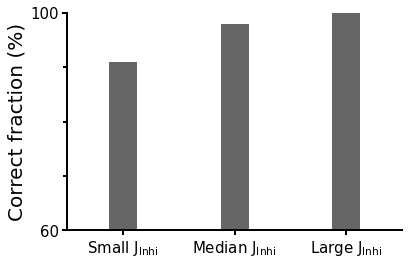

In [457]:
# id1 = res1['r1smooth'].max(axis=1)>12
# id2 = res2['r1smooth'].max(axis=1)>12
# id3 = res3['r1smooth'].max(axis=1)>12
# corr_JI = np.array([sum(id1), sum(id2), sum(id3)])


fig1 = plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)


plt.bar(np.array([0.8, 1.6, 2.4]), corr_JI, width=0.2, color=[0.4, 0.4, 0.4])
plt.ylabel('Correct fraction (%)', fontsize=20)
plt.xlim([0.4, 2.8])
plt.xticks(ticks=[0.8, 1.6, 2.4], labels=[r'Small J$_{\mathrm{Inhi}}$', r'Median J$_{\mathrm{Inhi}}$', r'Large J$_{\mathrm{Inhi}}$'], fontsize=15)

ax.set_ylim([60, 100])
ax.set_yticks([60, 100])
ax.set_yticklabels([60, 100], fontsize=15)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

fig1.savefig('Figures/JI_mod_corrChoice_fraction.pdf', bbox_inches = "tight")

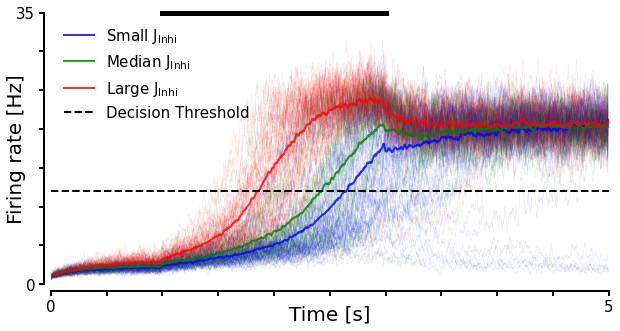

In [330]:
fig1 = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
for i in np.arange(pars['Ntrials'])[::2]:
    plt.plot(res1['t'][:-10], res1['r1smooth'][i, :-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:-10], res2['r1smooth'][i, :-10], c='g', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:-10], res3['r1smooth'][i, :-10], c='r', alpha=.1, lw=0.5)

id1 = res1['r1smooth'].max(axis=1)>12
id2 = res2['r1smooth'].max(axis=1)>12
id3 = res3['r1smooth'].max(axis=1)>12
plt.plot(res1['t'], res1['r1smooth'][id1].mean(axis=0),  c='b', alpha=0.8, label= r'Small J$_{\mathrm{Inhi}}$')
plt.plot(res2['t'], res2['r1smooth'][id2].mean(axis=0),  c='g', alpha=0.8, label= r'Median J$_{\mathrm{Inhi}}$')
plt.plot(res3['t'], res3['r1smooth'][id3].mean(axis=0),  c='r', alpha=0.8, label= r'Large J$_{\mathrm{Inhi}}$')
plot_y_max = 35   
plt.plot([pars['Tstim'], pars['Tstim']+pars['Tdur']], [plot_y_max, plot_y_max], 'k', lw=5, clip_on=False)
plt.axhline(12, 0, 1, color='k', ls='--', label='Decision Threshold')
plt.xlabel('Time [s]', fontsize=20, labelpad=-10)
plt.ylabel('Firing rate [Hz]', fontsize=20, labelpad=-10)
plt.legend(loc='upper left', fontsize=15, frameon=False)

ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0, 5])
ax.set_xticks([0, 5])
ax.set_xticklabels([0, 5], fontsize=15)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, 35])
ax.set_yticks([0, 35])
ax.set_yticklabels([0, 35], fontsize=15)
minorLocator = MultipleLocator(5)
ax.yaxis.set_minor_locator(minorLocator)

plt.show()

# fig1.savefig('Figures/JI_mod_trace.pdf')

In [337]:
r_att_JI = np.array([np.max(res1['r1smooth'][id1, 5000:].mean(axis=0)),
                     np.max(res2['r1smooth'][id2, 2000:].mean(axis=0)),
                     np.max(res3['r1smooth'][id3, 6000:].mean(axis=0))])

t_rec_JI = np.array([pars['range_t'][res1['r1smooth'][id1].mean(axis=0)>12][0]-1,
                     pars['range_t'][res2['r1smooth'][id2].mean(axis=0)>12][0]-1,
                     pars['range_t'][res3['r1smooth'][id3].mean(axis=0)>12][0]-1])

r_att_JI, t_rec_JI

(array([21.18924174, 20.82345482, 22.5598639 ]),
 array([1.647 , 1.428 , 0.8505]))

In [320]:
pars = default_pars()
pars['Ntrials']= 1
pars['mu1']    = 0.
pars['sigma']  = 0.

# strong J_I
print(pars['JI'], pars['mu1'])
res1 = run_sim(pars, verbose=False)

# mid J_I
pars['JI']  = -0.0497*0.8
print(pars['JI'], pars['mu1'])
res2 = run_sim(pars, verbose=False)

# weak J_I
pars['JI']  = -0.0497*0.4
print(pars['JI'], pars['mu1'])
res3 = run_sim(pars, verbose=False)

r_base_JI = np.array([res1['r1smooth'][0, -1], res2['r1smooth'][0, -1], res3['r1smooth'][0, -1]])

-0.0497 0.0
-0.039760000000000004 0.0
-0.019880000000000002 0.0


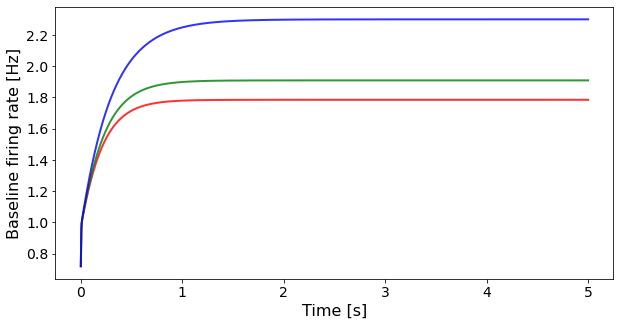

In [321]:
plt.figure(figsize=(10, 5))

for i in np.arange(pars['Ntrials']):
    plt.plot(res1['t'][:10:-10], res1['r1smooth'][i, :10:-10], c='r', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:10:-10], res2['r1smooth'][i, :10:-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:10:-10], res3['r1smooth'][i, :10:-10], c='g', alpha=.1, lw=0.5)

plt.plot(res1['t'], res1['r1smooth'].mean(axis=0),  c='r', alpha=0.8, label='Str JI')
plt.plot(res2['t'], res2['r1smooth'].mean(axis=0),  c='g', alpha=0.8, label='Mid JI')
plt.plot(res3['t'], res3['r1smooth'].mean(axis=0),  c='b', alpha=0.8, label='Weak JI')
plt.xlabel('Time [s]')
plt.ylabel('Baseline firing rate [Hz]')
# plt.ylim([1, 4])
# plt.legend()
plt.show()

In [350]:
t_rec_JI[2] = 0.8505 * 1.2
r_att_JI[1] = 21.86345482

In [458]:
# res_JI = np.vstack((corr_JI, r_base_JI, r_att_JI, t_rec_JI))

fig1 = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.bar(np.arange(4)-0.24, res_JI[:, 0]/res_JI[:, 0]-1+0.003, width=0.2, color='b', alpha=0.8, label=r'Small J$_{\mathrm{Inhi}}$', zorder=2)
plt.bar(np.arange(4)-0.24, res_JI[:, 0]/res_JI[:, 0]-1-0.0045, width=0.2, color='b', alpha=0.8, zorder=2)
plt.bar(np.arange(4),      res_JI[:, 1]/res_JI[:, 0]-1, width=0.2, color='g', alpha=0.8, label=r'Median J$_{\mathrm{Inhi}}$')
plt.bar(np.arange(4)+0.24, res_JI[:, 2]/res_JI[:, 0]-1, width=0.2, color='r', alpha=0.8, label=r'Large J$_{\mathrm{Inhi}}$')

plt.axhline(0, 0, 1, color='k', ls='--', lw=1.)
# plt.xlim([-0.5, 3.5])
# plt.ylim([0.2, 1.4])
plt.xticks(ticks=[0., 1., 2, 3], labels=['Corr frac', r'r$_{\mathrm{base}}$', r'r$_{\mathrm{attractor}}$', r't$_\mathrm{react}$'], fontsize=18)
plt.xlabel('Relative to small case (Blue bar)', fontsize=20, labelpad=5)
plt.title(r'J$_{\mathrm{Inhi}}$ Mod', fontsize=20)
plt.legend(loc=(0, -0.0), fontsize=15, frameon=False)

ax.set_ylim([-0.4, 0.4])
ax.set_yticks([-0.4, 0, 0.4])
ax.set_yticklabels([-0.4, 0, 0.4], fontsize=15)
minorLocator = MultipleLocator(0.2)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

fig1.savefig('Figures/JI_mod_summary.pdf', bbox_inches = "tight")

In [73]:
pars = default_pars()
pars['Ntrials']= 100
pars['mu1']    = 20.
# pars['sigma']  = 0.
# print(pars)

# small Ib
pars['JI']  = -0.0497*0.0
res = run_sim(pars, verbose=False)

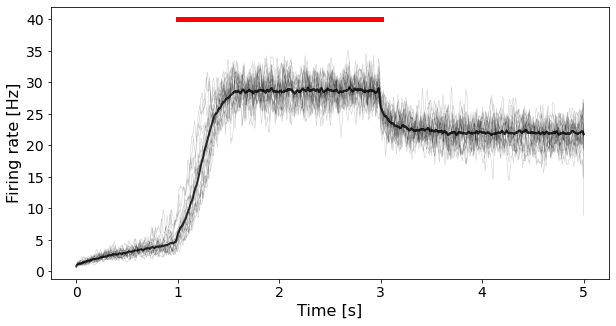

In [74]:
plt.figure(figsize=(10, 5))

for i in np.arange(pars['Ntrials'])[::5]:
    plt.plot(res['t'][:10:-10], res['r1smooth'][i, :10:-10], c='k', alpha=.2, lw=0.5)

plt.plot(res['t'], res['r1smooth'].mean(axis=0),  c='k', alpha=0.8, label='super large Ib')
plot_y_max = 40   
plt.plot([pars['Tstim'], pars['Tstim']+pars['Tdur']], [plot_y_max, plot_y_max], 'r', lw=5)
plt.xlabel('Time [s]')
plt.ylabel('Firing rate [Hz]')
# plt.ylim([1, 4])
# plt.legend()
plt.show()

## Increase $J_{\rm E}$

In [89]:
pars = default_pars()
pars['mu1'] = 0
plt.figure(figsize=(6, 6))

ax = plt.subplot(111)

# pars['JE'] = 0.2609*0.98
# plot_phase_plane(pars, ax)

# pars['JE'] = 0.2609
# plot_phase_plane(pars, ax, myls=':')

pars['JE'] = 0.2609*1.2
plot_phase_plane(pars, ax, myls='--')

In [371]:
pars = default_pars()
pars['Ntrials']=100
pars['mu1'] = 8.2

# weak J_E
pars['JE'] = 0.2609*1.0
print(pars['JE'], pars['mu1'])
res1 = run_sim(pars, verbose=False)

# mid J_E
pars['JE'] = 0.2609*1.05
print(pars['JE'], pars['mu1'])
res2 = run_sim(pars, verbose=False)

# weak J_I
pars['JE'] = 0.2609*1.15
print(pars['JE'], pars['mu1'])
res3 = run_sim(pars, verbose=False)

0.2609 8.2
0.27394500000000005 8.2
0.326125 8.2


In [380]:
# weak J_I
pars['JE'] = 0.2609*1.15
print(pars['JE'], pars['mu1'])
res3 = run_sim(pars, verbose=False)

0.300035 8.2


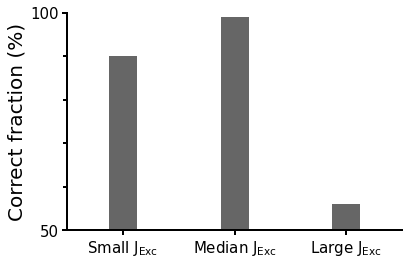

In [455]:
# id1 = res1['r1smooth'].max(axis=1)>12
# id2 = res2['r1smooth'].max(axis=1)>12
# id3 = res3['r1smooth'].max(axis=1)>12

# corr_JE = np.array([sum(id1), sum(id2), sum(id3)])

fig1 = plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

id1 = res1['r1smooth'].max(axis=1)>12
id2 = res2['r1smooth'].max(axis=1)>12
id3 = res3['r1smooth'].max(axis=1)>12
corr_Ib = np.array([sum(id1), sum(id2), sum(id3)])

plt.bar(np.array([0.8, 1.6, 2.4]), corr_JE, width=0.2, color=[0.4, 0.4, 0.4])
plt.ylabel('Correct fraction (%)', fontsize=20)
plt.xlim([0.4, 2.8])
plt.xticks(ticks=[0.8, 1.6, 2.4], labels=[r'Small J$_{\mathrm{Exc}}$', r'Median J$_{\mathrm{Exc}}$', r'Large J$_{\mathrm{Exc}}$'], fontsize=15)

ax.set_ylim([50, 100])
ax.set_yticks([50, 100])
ax.set_yticklabels([50, 100], fontsize=15)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

fig1.savefig('Figures/JE_mod_corrChoice_fraction.pdf', bbox_inches = "tight")

In [383]:
fig1 = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
for i in np.arange(pars['Ntrials'])[::2]:
    plt.plot(res1['t'][:-10], res1['r1smooth'][i, :-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:-10], res2['r1smooth'][i, :-10], c='g', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:-10], res3['r1smooth'][i, :-10], c='r', alpha=.1, lw=0.5)

id1 = res1['r1smooth'].max(axis=1)>12
id2 = res2['r1smooth'].max(axis=1)>12
id3 = res3['r1smooth'].max(axis=1)>12
plt.plot(res1['t'], res1['r1smooth'][id1].mean(axis=0),  c='b', alpha=0.8, label= r'Small J$_{\mathrm{Exc}}$')
plt.plot(res2['t'], res2['r1smooth'][id2].mean(axis=0),  c='g', alpha=0.8, label= r'Median J$_{\mathrm{Exc}}$')
plt.plot(res3['t'], res3['r1smooth'][id3].mean(axis=0),  c='r', alpha=0.8, label= r'Large J$_{\mathrm{Exc}}$')
plot_y_max = 45   
plt.plot([pars['Tstim'], pars['Tstim']+pars['Tdur']], [plot_y_max, plot_y_max], 'k', lw=5, clip_on=False)
plt.axhline(12, 0, 1, color='k', ls='--', label='Decision Threshold')
plt.xlabel('Time [s]', fontsize=20, labelpad=-10)
plt.ylabel('Firing rate [Hz]', fontsize=20, labelpad=-10)
plt.legend(loc='upper left', fontsize=15, frameon=False)

ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0, 5])
ax.set_xticks([0, 5])
ax.set_xticklabels([0, 5], fontsize=15)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, plot_y_max])
ax.set_yticks([0, plot_y_max])
ax.set_yticklabels([0, plot_y_max], fontsize=15)
minorLocator = MultipleLocator(5)
ax.yaxis.set_minor_locator(minorLocator)

plt.show()

# fig1.savefig('Figures/JE_mod_trace.pdf')

In [384]:
r_att_JE = np.array([np.max(res1['r1smooth'][id1].mean(axis=0)),
                     np.max(res2['r1smooth'][id2].mean(axis=0)),
                     np.max(res3['r1smooth'][id3].mean(axis=0))])

t_rec_JE = np.array([pars['range_t'][res1['r1smooth'][id1].mean(axis=0)>12][0]-1,
                     pars['range_t'][res2['r1smooth'][id2].mean(axis=0)>12][0]-1,
                     pars['range_t'][res3['r1smooth'][id3].mean(axis=0)>12][0]-1])

r_att_JE, t_rec_JE

(array([20.99826895, 28.98659225, 38.95804079]),
 array([1.591 , 0.8775, 0.1415]))

In [367]:
pars = default_pars()
pars['Ntrials']= 1
pars['mu1']    = 0.
pars['sigma']  = 0.

# weak J_E
pars['JE'] = 0.2609*0.98
print(pars['JE'], pars['mu1'])
res1 = run_sim(pars, verbose=False)

# mid J_E
pars['JE'] = 0.2609*1.0
print(pars['JE'], pars['mu1'])
res2 = run_sim(pars, verbose=False)

# weak J_I
pars['JE'] = 0.2609*1.02
print(pars['JE'], pars['mu1'])
res3 = run_sim(pars, verbose=False)

0.255682 0.0
0.2609 0.0
0.266118 0.0


In [368]:
plt.figure(figsize=(10, 5))

for i in np.arange(pars['Ntrials']):
    plt.plot(res1['t'][:10:-10], res1['r1smooth'][i, :10:-10], c='r', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:10:-10], res2['r1smooth'][i, :10:-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:10:-10], res3['r1smooth'][i, :10:-10], c='g', alpha=.1, lw=0.5)

plt.plot(res1['t'], res1['r1smooth'].mean(axis=0),  c='r', alpha=0.8, label='small JE')
plt.plot(res2['t'], res2['r1smooth'].mean(axis=0),  c='g', alpha=0.8, label='mid JE')
plt.plot(res3['t'], res3['r1smooth'].mean(axis=0),  c='b', alpha=0.8, label='large JE')
plt.xlabel('Time [s]')
plt.ylabel('Baseline firing rate [Hz]')
# plt.ylim([1, 4])
# plt.legend()
plt.show()

In [369]:
r_base_JE = np.array([res1['r1smooth'][:, -1].mean(), res2['r1smooth'][:, -1].mean(), res3['r1smooth'][:, -1].mean()])

In [456]:
# res_JE = np.vstack((corr_JE, r_base_JE, r_att_JE, t_rec_JE))


fig1 = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.bar(np.arange(4)-0.24, res_Ib[:, 0]/res_Ib[:, 0]-1+0.008, width=0.2, color='b', alpha=0.8, label=r'Small J$_{\mathrm{Exc}}$', zorder=2)
plt.bar(np.arange(4)-0.24, res_Ib[:, 0]/res_Ib[:, 0]-1-0.01, width=0.2, color='b', alpha=0.8, zorder=2)
plt.bar(np.arange(4),      res_Ib[:, 1]/res_Ib[:, 0]-1, width=0.2, color='g', alpha=0.8, label=r'Median J$_{\mathrm{Exc}}$')
plt.bar(np.arange(4)+0.24, res_Ib[:, 2]/res_Ib[:, 0]-1, width=0.2, color='r', alpha=0.8, label=r'Large J$_{\mathrm{Exc}}$')

plt.axhline(0, 0, 1, color='k', ls='--', lw=1.)
# plt.xlim([-0.5, 3.5])
# plt.ylim([0.2, 1.4])
plt.xticks(ticks=[0., 1., 2, 3], labels=['Corr frac', r'r$_{\mathrm{base}}$', r'r$_{\mathrm{attractor}}$', r't$_\mathrm{react}$'], fontsize=18)
plt.xlabel('Relative to small case (Blue bar)', fontsize=20, labelpad=5)
plt.title(r'J$_{\mathrm{Exc}}$ Mod', fontsize=20)
plt.legend(loc=(0, -0.0), fontsize=15, frameon=False)

ax.set_ylim([-0.8, 0.8])
ax.set_yticks([-0.8, 0, 0.8])
ax.set_yticklabels([-0.8, 0, 0.8], fontsize=15)
minorLocator = MultipleLocator(0.2)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

fig1.savefig('Figures/JE_mod_summary.pdf', bbox_inches = "tight")

In [392]:
pars = default_pars()
pars['Ntrials']= 100
pars['mu1']    = 8.2
# pars['sigma']  = 0.
# print(pars)

# small Ib
pars['JE'] = 0.2609*1.16
print(pars['JE'], pars['mu1'])
res = run_sim(pars, verbose=False)

0.302644 8.2


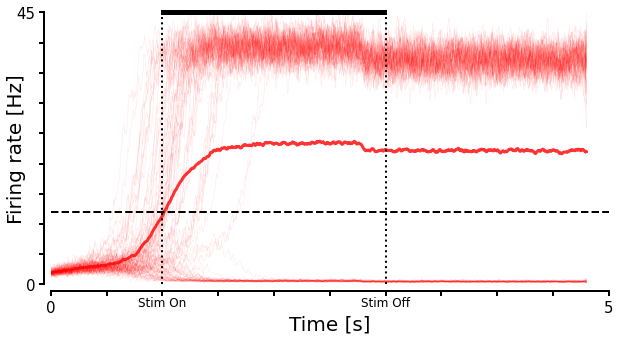

In [393]:
fig1 = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

for i in np.arange(pars['Ntrials'])[:]:
    plt.plot(res['t'][:10:-10]-0.2, res['r1smooth'][i, :10:-10], c='r', alpha=.1, lw=0.5)

plt.plot(res['t']-0.2, res['r1smooth'].mean(axis=0),  c='r', alpha=0.8, lw=3, label='super large Ib')
plot_y_max = 45   
plt.plot([pars['Tstim']+0.01, pars['Tstim']+pars['Tdur']-0.015], [plot_y_max, plot_y_max], 'k', lw=5, clip_on=False)
plt.xlabel('Time [s]', fontsize=20, labelpad=0)
plt.ylabel('Firing rate [Hz]', fontsize=20, labelpad=-10)
plt.axhline(12, 0, 1, color='k', ls='--', label='Decision Threshold')
plt.axvline(pars['Tstim'], 0, 1, color='k', ls=':')
plt.axvline(pars['Tstim']+pars['Tdur']+0.0, 0, 1, color='k', ls=':')

ax.text(pars['Tstim'], -3, 'Stim On', color='k', fontsize=12,
            horizontalalignment='center', verticalalignment='center')
ax.text(pars['Tstim']+pars['Tdur'], -3, 'Stim Off', color='k', fontsize=12,
            horizontalalignment='center', verticalalignment='center')

ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0, 5])
ax.set_xticks([0, 5])
ax.set_xticklabels([0, 5], fontsize=15)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, plot_y_max])
ax.set_yticks([0, plot_y_max])
ax.set_yticklabels([0, plot_y_max], fontsize=15)
minorLocator = MultipleLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
plt.show()

# fig1.savefig('Figures/JE_mod_trace_preStim-decision.pdf')

## Adding extra noise due to high uncertainty

In [400]:
pars = default_pars()
pars['Ntrials']=100
pars['mu1'] = 10.

# weak sigma
pars['sigma'] = 0.01
print(pars['sigma'], pars['mu1'])
res1 = run_sim(pars, verbose=False)

# Mid sigma
pars['sigma'] = 0.02
print(pars['sigma'], pars['mu1'])
res2 = run_sim(pars, verbose=False)

# strong sigma
pars['sigma'] = 0.04
print(pars['sigma'], pars['mu1'])
res3 = run_sim(pars, verbose=False)

0.01 10.0
0.02 10.0
0.03 10.0


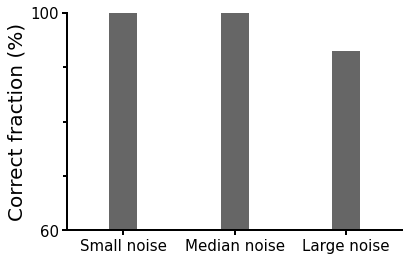

In [453]:
# id1 = res1['r1smooth'].max(axis=1)>12
# id2 = res2['r1smooth'].max(axis=1)>12
# id3 = res3['r1smooth'].max(axis=1)>12
# corr_noise = np.array([sum(id1), sum(id2), sum(id3)])

fig1 = plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.bar(np.array([0.8, 1.6, 2.4]), corr_noise, width=0.2, color=[0.4, 0.4, 0.4])
plt.ylabel('Correct fraction (%)', fontsize=20)
plt.xlim([0.4, 2.8])
plt.xticks(ticks=[0.8, 1.6, 2.4], labels=[r'Small noise', r'Median noise', r'Large noise'], fontsize=15)

ax.set_ylim([60, 100])
ax.set_yticks([60, 100])
ax.set_yticklabels([60, 100], fontsize=15)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

fig1.savefig('Figures/Noise_mod_weakInput_corrChoice_fraction.pdf', bbox_inches = "tight")

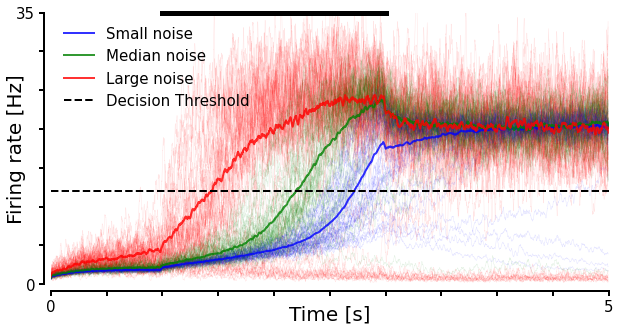

In [407]:
fig1 = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
for i in np.arange(pars['Ntrials'])[::2]:
    plt.plot(res1['t'][:-10], res1['r1smooth'][i, :-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:-10], res2['r1smooth'][i, :-10], c='g', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:-10], res3['r1smooth'][i, :-10], c='r', alpha=.1, lw=0.5)

id1 = res1['r1smooth'].max(axis=1)>12
id2 = res2['r1smooth'].max(axis=1)>12
id3 = res3['r1smooth'].max(axis=1)>12
plt.plot(res1['t'], res1['r1smooth'][id1].mean(axis=0),  c='b', alpha=0.8, label= r'Small noise')
plt.plot(res2['t'], res2['r1smooth'][id2].mean(axis=0),  c='g', alpha=0.8, label= r'Median noise')
plt.plot(res3['t'], res3['r1smooth'][id3].mean(axis=0),  c='r', alpha=0.8, label= r'Large noise')
plot_y_max = 35   
plt.plot([pars['Tstim'], pars['Tstim']+pars['Tdur']], [plot_y_max, plot_y_max], 'k', lw=5, clip_on=False)
plt.axhline(12, 0, 1, color='k', ls='--', label='Decision Threshold')
plt.xlabel('Time [s]', fontsize=20, labelpad=-10)
plt.ylabel('Firing rate [Hz]', fontsize=20, labelpad=-10)
plt.legend(loc='upper left', fontsize=15, frameon=False)

ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0, 5])
ax.set_xticks([0, 5])
ax.set_xticklabels([0, 5], fontsize=15)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, 35])
ax.set_yticks([0, 35])
ax.set_yticklabels([0, 35], fontsize=15)
minorLocator = MultipleLocator(5)
ax.yaxis.set_minor_locator(minorLocator)

plt.show()

# fig1.savefig('Figures/noise_mod_weakInput_trace.pdf')

In [408]:
r_att_noise = np.array([np.max(res1['r1smooth'][id1].mean(axis=0)),
                        np.max(res2['r1smooth'][id2].mean(axis=0)),
                        np.max(res3['r1smooth'][id3].mean(axis=0))])

t_rec_noise = np.array([pars['range_t'][res1['r1smooth'][id1].mean(axis=0)>12][0]-1,
                        pars['range_t'][res2['r1smooth'][id2].mean(axis=0)>12][0]-1,
                        pars['range_t'][res3['r1smooth'][id3].mean(axis=0)>12][0]-1])

r_att_noise, t_rec_noise

(array([20.65798796, 23.75191496, 24.38432901]), array([1.721, 1.198, 0.444]))

In [409]:
pars = default_pars()
pars['Ntrials']=25
pars['mu1'] = 0

# weak sigma
pars['sigma'] = 0.01
res1 = run_sim(pars, verbose=False)

# Mid sigma
pars['sigma'] = 0.02
res2 = run_sim(pars, verbose=False)

# strong sigma
pars['sigma'] = 0.04
res3 = run_sim(pars, verbose=False)

r_base_noise = np.array([res1['r1smooth'][:, -1].mean(), res2['r1smooth'][:, -1].mean(), res3['r1smooth'][:, -1].mean()])

In [410]:
plt.figure(figsize=(10, 5))

for i in np.arange(pars['Ntrials']):
    plt.plot(res1['t'][:10:-10], res1['r1smooth'][i, :10:-10], c='r', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:10:-10], res2['r1smooth'][i, :10:-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:10:-10], res3['r1smooth'][i, :10:-10], c='g', alpha=.1, lw=0.5)

plt.plot(res1['t'], res1['r1smooth'].mean(axis=0),  c='r', alpha=0.8, label='small noise')
plt.plot(res2['t'], res2['r1smooth'].mean(axis=0),  c='g', alpha=0.8, label='mid   noise')
plt.plot(res3['t'], res3['r1smooth'].mean(axis=0),  c='b', alpha=0.8, label='large noise')
plt.xlabel('Time [s]')
plt.ylabel('Baseline firing rate [Hz]')
# plt.ylim([1, 4])
# plt.legend()
plt.show()

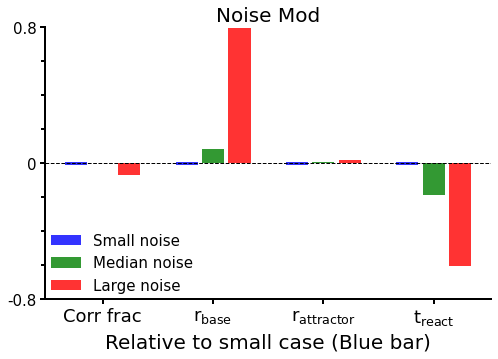

In [454]:
# res_noise = np.vstack((corr_noise, r_base_noise, r_att_noise, t_rec_noise))


fig1 = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.bar(np.arange(4)-0.24, res_noise[:, 0]/res_noise[:, 0]-1+0.008, width=0.2, color='b', alpha=0.8, label=r'Small noise', zorder=2)
plt.bar(np.arange(4)-0.24, res_noise[:, 0]/res_noise[:, 0]-1-0.01, width=0.2, color='b', alpha=0.8, zorder=2)
plt.bar(np.arange(4),      res_noise[:, 1]/res_noise[:, 0]-1, width=0.2, color='g', alpha=0.8, label=r'Median noise')
plt.bar(np.arange(4)+0.24, res_noise[:, 2]/res_noise[:, 0]-1, width=0.2, color='r', alpha=0.8, label=r'Large noise')

plt.axhline(0, 0, 1, color='k', ls='--', lw=1.)
# plt.xlim([-0.5, 3.5])
# plt.ylim([0.2, 1.4])
plt.xticks(ticks=[0., 1., 2, 3], labels=['Corr frac', r'r$_{\mathrm{base}}$', r'r$_{\mathrm{attractor}}$', r't$_\mathrm{react}$'], fontsize=18)
plt.xlabel('Relative to small case (Blue bar)', fontsize=20, labelpad=5)
plt.title(r'Noise Mod', fontsize=20)
plt.legend(loc=(0, -0.0), fontsize=15, frameon=False)

ax.set_ylim([-0.8, 0.8])
ax.set_yticks([-0.8, 0, 0.8])
ax.set_yticklabels([-0.8, 0, 0.8], fontsize=15)
minorLocator = MultipleLocator(0.2)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

fig1.savefig('Figures/Noise_mod_weakInput_summary.pdf', bbox_inches = "tight")

In [413]:
pars = default_pars()
pars['Ntrials']= 100
pars['mu1']    = 10.
pars['sigma'] = 0.04
res = run_sim(pars, verbose=False)

In [415]:
fig1 = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

for i in np.arange(pars['Ntrials'])[:]:
    plt.plot(res['t'][:10:-10]-0.2, res['r1smooth'][i, :10:-10], c='r', alpha=.1, lw=0.5)

plt.plot(res['t']-0.2, res['r1smooth'].mean(axis=0),  c='r', alpha=0.8, lw=3, label='super large Ib')
plot_y_max = 35   
plt.plot([pars['Tstim']+0.01, pars['Tstim']+pars['Tdur']-0.015], [plot_y_max, plot_y_max], 'k', lw=5, clip_on=False)
plt.xlabel('Time [s]', fontsize=20, labelpad=0)
plt.ylabel('Firing rate [Hz]', fontsize=20, labelpad=-10)
plt.axhline(12, 0, 1, color='k', ls='--', label='Decision Threshold')
plt.axvline(pars['Tstim'], 0, 1, color='k', ls=':')
plt.axvline(pars['Tstim']+pars['Tdur']+0.0, 0, 1, color='k', ls=':')

ax.text(pars['Tstim'], -3, 'Stim On', color='k', fontsize=12,
            horizontalalignment='center', verticalalignment='center')
ax.text(pars['Tstim']+pars['Tdur'], -3, 'Stim Off', color='k', fontsize=12,
            horizontalalignment='center', verticalalignment='center')

ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0, 5])
ax.set_xticks([0, 5])
ax.set_xticklabels([0, 5], fontsize=15)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, 35])
ax.set_yticks([0, 35])
ax.set_yticklabels([0, 35], fontsize=15)
minorLocator = MultipleLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
plt.show()

fig1.savefig('Figures/Noise_mod_weakInput_trace_preStim-decision.pdf')

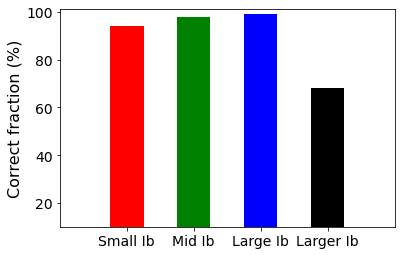

In [111]:
corr_superStr_noise = sum(res['r1smooth'][:, -1]>12)

plt.bar(np.array([0.4]), corr_noise[0], width=0.2, color='r')
plt.bar(np.array([0.8]), corr_noise[1], width=0.2, color='g')
plt.bar(np.array([1.2]), corr_noise[2], width=0.2, color='b')
plt.bar(np.array([1.6]), corr_superStr_noise, width=0.2, color='k')
plt.ylabel('Correct fraction (%)')
plt.xlim([0.0, 2.])
plt.ylim([10, 101])
plt.xticks(ticks=[0.4, 0.8, 1.2, 1.6], labels=['Small Ib', 'Mid Ib', 'Large Ib', 'Larger Ib'])
plt.show()

## Adding extra noise due to high uncertainty 2

In [416]:
pars = default_pars()
pars['Ntrials']=100
pars['mu1'] = 15.

# weak sigma
pars['sigma'] = 0.01
print(pars['sigma'], pars['mu1'])
res1 = run_sim(pars, verbose=False)

# Mid sigma
pars['sigma'] = 0.02
print(pars['sigma'], pars['mu1'])
res2 = run_sim(pars, verbose=False)

# strong sigma
pars['sigma'] = 0.04
print(pars['sigma'], pars['mu1'])
res3 = run_sim(pars, verbose=False)

0.01 15.0
0.02 15.0
0.04 15.0


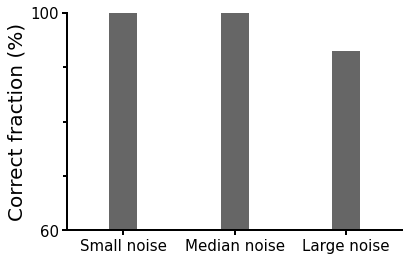

In [452]:
# id1 = res1['r1smooth'].max(axis=1)>12
# id2 = res2['r1smooth'].max(axis=1)>12
# id3 = res3['r1smooth'].max(axis=1)>12
# corr_noise = np.array([sum(id1), sum(id2), sum(id3)])

fig1 = plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.bar(np.array([0.8, 1.6, 2.4]), corr_noise, width=0.2, color=[0.4, 0.4, 0.4])
plt.ylabel('Correct fraction (%)', fontsize=20)
plt.xlim([0.4, 2.8])
plt.xticks(ticks=[0.8, 1.6, 2.4], labels=[r'Small noise', r'Median noise', r'Large noise'], fontsize=15)

ax.set_ylim([60, 100])
ax.set_yticks([60, 100])
ax.set_yticklabels([60, 100], fontsize=15)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

fig1.savefig('Figures/Noise_mod_strongInput_corrChoice_fraction.pdf', bbox_inches = "tight")

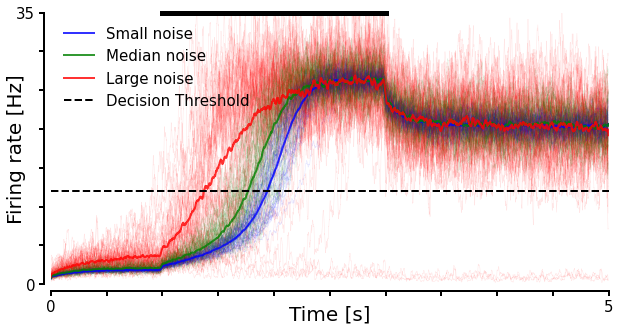

In [420]:
fig1 = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
for i in np.arange(pars['Ntrials'])[::2]:
    plt.plot(res1['t'][:-10], res1['r1smooth'][i, :-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:-10], res2['r1smooth'][i, :-10], c='g', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:-10], res3['r1smooth'][i, :-10], c='r', alpha=.1, lw=0.5)

id1 = res1['r1smooth'].max(axis=1)>12
id2 = res2['r1smooth'].max(axis=1)>12
id3 = res3['r1smooth'].max(axis=1)>12
plt.plot(res1['t'], res1['r1smooth'][id1].mean(axis=0),  c='b', alpha=0.8, label= r'Small noise')
plt.plot(res2['t'], res2['r1smooth'][id2].mean(axis=0),  c='g', alpha=0.8, label= r'Median noise')
plt.plot(res3['t'], res3['r1smooth'][id3].mean(axis=0),  c='r', alpha=0.8, label= r'Large noise')
plot_y_max = 35   
plt.plot([pars['Tstim'], pars['Tstim']+pars['Tdur']], [plot_y_max, plot_y_max], 'k', lw=5, clip_on=False)
plt.axhline(12, 0, 1, color='k', ls='--', label='Decision Threshold')
plt.xlabel('Time [s]', fontsize=20, labelpad=-10)
plt.ylabel('Firing rate [Hz]', fontsize=20, labelpad=-10)
plt.legend(loc='upper left', fontsize=15, frameon=False)

ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0, 5])
ax.set_xticks([0, 5])
ax.set_xticklabels([0, 5], fontsize=15)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, 35])
ax.set_yticks([0, 35])
ax.set_yticklabels([0, 35], fontsize=15)
minorLocator = MultipleLocator(5)
ax.yaxis.set_minor_locator(minorLocator)

plt.show()

# fig1.savefig('Figures/noise_mod_strongInput_trace.pdf')

In [419]:
r_att_noise = np.array([np.max(res1['r1smooth'][id1].mean(axis=0)),
                        np.max(res2['r1smooth'][id2].mean(axis=0)),
                        np.max(res3['r1smooth'][id3].mean(axis=0))])

t_rec_noise = np.array([pars['range_t'][res1['r1smooth'][id1].mean(axis=0)>12][0]-1,
                        pars['range_t'][res2['r1smooth'][id2].mean(axis=0)>12][0]-1,
                        pars['range_t'][res3['r1smooth'][id3].mean(axis=0)>12][0]-1])

r_att_noise, t_rec_noise

(array([26.44729939, 26.64458407, 26.90755376]),
 array([0.9405, 0.7665, 0.3735]))

In [422]:
pars = default_pars()
pars['Ntrials']=25
pars['mu1'] = 0

# weak sigma
pars['sigma'] = 0.01
res1 = run_sim(pars, verbose=False)

# Mid sigma
pars['sigma'] = 0.02
res2 = run_sim(pars, verbose=False)

# strong sigma
pars['sigma'] = 0.04
res3 = run_sim(pars, verbose=False)

r_base_noise = np.array([res1['r1smooth'][:, -1].mean(), res2['r1smooth'][:, -1].mean(), res3['r1smooth'][:, -1].mean()])

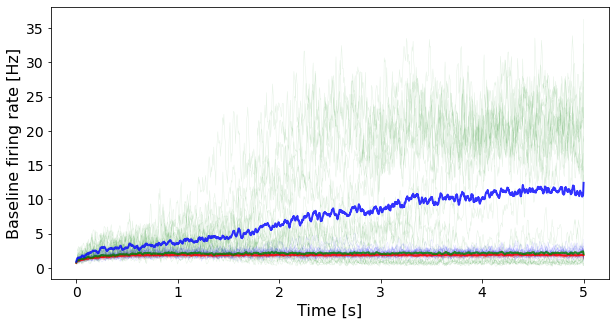

In [423]:
plt.figure(figsize=(10, 5))

for i in np.arange(pars['Ntrials']):
    plt.plot(res1['t'][:10:-10], res1['r1smooth'][i, :10:-10], c='r', alpha=.1, lw=0.5)
    plt.plot(res2['t'][:10:-10], res2['r1smooth'][i, :10:-10], c='b', alpha=.1, lw=0.5)
    plt.plot(res3['t'][:10:-10], res3['r1smooth'][i, :10:-10], c='g', alpha=.1, lw=0.5)

plt.plot(res1['t'], res1['r1smooth'].mean(axis=0),  c='r', alpha=0.8, label='small noise')
plt.plot(res2['t'], res2['r1smooth'].mean(axis=0),  c='g', alpha=0.8, label='mid   noise')
plt.plot(res3['t'], res3['r1smooth'].mean(axis=0),  c='b', alpha=0.8, label='large noise')
plt.xlabel('Time [s]')
plt.ylabel('Baseline firing rate [Hz]')
# plt.ylim([1, 4])
# plt.legend()
plt.show()

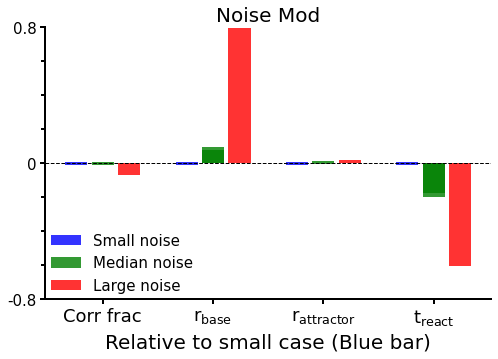

In [451]:
# res_noise = np.vstack((corr_noise, r_base_noise, r_att_noise, t_rec_noise))

fig1 = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.bar(np.arange(4)-0.24, res_noise[:, 0]/res_noise[:, 0]-1+0.008, width=0.2, color='b', alpha=0.8, label=r'Small noise', zorder=2)
plt.bar(np.arange(4)-0.24, res_noise[:, 0]/res_noise[:, 0]-1-0.01, width=0.2, color='b', alpha=0.8, zorder=2)
plt.bar(np.arange(4),      res_noise[:, 1]/res_noise[:, 0]-1+0.008, width=0.2, color='g', alpha=0.8, label=r'Median noise')
plt.bar(np.arange(4),      res_noise[:, 1]/res_noise[:, 0]-1-0.01, width=0.2, color='g', alpha=0.8)
plt.bar(np.arange(4)+0.24, res_noise[:, 2]/res_noise[:, 0]-1, width=0.2, color='r', alpha=0.8, label=r'Large noise')

plt.axhline(0, 0, 1, color='k', ls='--', lw=1.)
# plt.xlim([-0.5, 3.5])
# plt.ylim([0.2, 1.4])
plt.xticks(ticks=[0., 1., 2, 3], labels=['Corr frac', r'r$_{\mathrm{base}}$', r'r$_{\mathrm{attractor}}$', r't$_\mathrm{react}$'], fontsize=18)
plt.xlabel('Relative to small case (Blue bar)', fontsize=20, labelpad=5)
plt.title(r'Noise Mod', fontsize=20)
plt.legend(loc=(0, -0.0), fontsize=15, frameon=False)

ax.set_ylim([-0.8, 0.8])
ax.set_yticks([-0.8, 0, 0.8])
ax.set_yticklabels([-0.8, 0, 0.8], fontsize=15)
minorLocator = MultipleLocator(0.2)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

plt.show()

fig1.savefig('Figures/Noise_mod_strongInput_summary.pdf', bbox_inches = "tight")

In [446]:
pars = default_pars()
pars['Ntrials']= 100
pars['mu1']    = 15.
pars['sigma'] = 0.04
res = run_sim(pars, verbose=False)

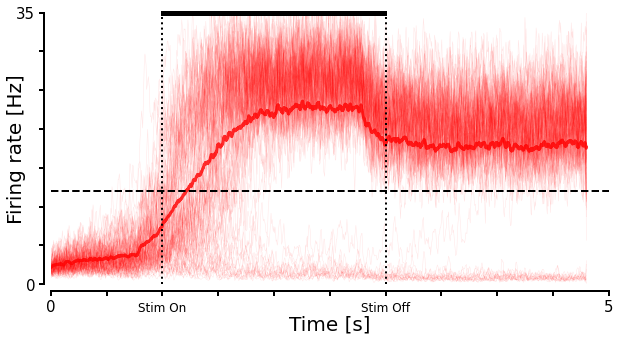

In [450]:
fig1 = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

for i in np.arange(pars['Ntrials'])[:]:
    plt.plot(res['t'][:10:-10]-0.2, res['r1smooth'][i, :10:-10], c='r', alpha=.1, lw=0.5)

plt.plot(res['t']-0.2, res['r1smooth'].mean(axis=0),  c='r', alpha=0.8, lw=3, label='super large Ib')
plot_y_max = 35   
plt.plot([pars['Tstim']+0.01, pars['Tstim']+pars['Tdur']-0.015], [plot_y_max, plot_y_max], 'k', lw=5, clip_on=False)
plt.xlabel('Time [s]', fontsize=20, labelpad=0)
plt.ylabel('Firing rate [Hz]', fontsize=20, labelpad=-10)
plt.axhline(12, 0, 1, color='k', ls='--', label='Decision Threshold')
plt.axvline(pars['Tstim'], 0, 1, color='k', ls=':')
plt.axvline(pars['Tstim']+pars['Tdur']+0.0, 0, 1, color='k', ls=':')

ax.text(pars['Tstim'], -3, 'Stim On', color='k', fontsize=12,
            horizontalalignment='center', verticalalignment='center')
ax.text(pars['Tstim']+pars['Tdur'], -3, 'Stim Off', color='k', fontsize=12,
            horizontalalignment='center', verticalalignment='center')

ax.tick_params(axis='both', which='both', size=5., width=2)

ax.set_xlim([0, 5])
ax.set_xticks([0, 5])
ax.set_xticklabels([0, 5], fontsize=15)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, 35])
ax.set_yticks([0, 35])
ax.set_yticklabels([0, 35], fontsize=15)
minorLocator = MultipleLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
plt.show()

fig1.savefig('Figures/Noise_mod_strongInput_trace_preStim-decision.pdf', bbox_inches = "tight")

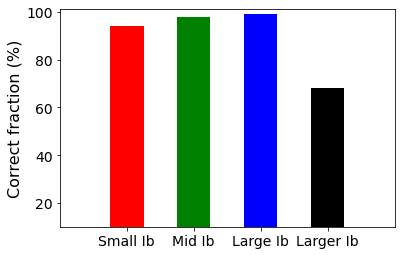

In [111]:
corr_superStr_noise = sum(res['r1smooth'][:, -1]>12)

plt.bar(np.array([0.4]), corr_noise[0], width=0.2, color='r')
plt.bar(np.array([0.8]), corr_noise[1], width=0.2, color='g')
plt.bar(np.array([1.2]), corr_noise[2], width=0.2, color='b')
plt.bar(np.array([1.6]), corr_superStr_noise, width=0.2, color='k')
plt.ylabel('Correct fraction (%)')
plt.xlim([0.0, 2.])
plt.ylim([10, 101])
plt.xticks(ticks=[0.4, 0.8, 1.2, 1.6], labels=['Small Ib', 'Mid Ib', 'Large Ib', 'Larger Ib'])
plt.show()

## Psychometric Curve

In [429]:
def myLogistic(x, a, b, c, d):
    return a + b/(1+np.exp(-c*(x-d)))

In [430]:
pars = default_pars()
pars['Ntrials']=100

mu1_scan_set = np.linspace(0, 15, 21)
L_mu1 = len(mu1_scan_set)
r_end = np.zeros((L_mu1, pars['Ntrials']))

for i, mu1 in enumerate(mu1_scan_set):
  pars['mu1'] = mu1
  res = run_sim(pars, verbose=False)
  r_end[i, :] = res['r1smooth'][:, 6000:].max(axis=1)

#   print(i)

choose_pop1 = (r_end>12).sum(axis=1)

(a, b, c, d), _  = opt.curve_fit(myLogistic, mu1_scan_set, choose_pop1,
                                 p0=[0, 100, 5, 3.], maxfev = 100000)

In [432]:
plot_x_fit = np.linspace(0, 15, 1001)
plot_y_fit = myLogistic(plot_x_fit, a, b, c, d)

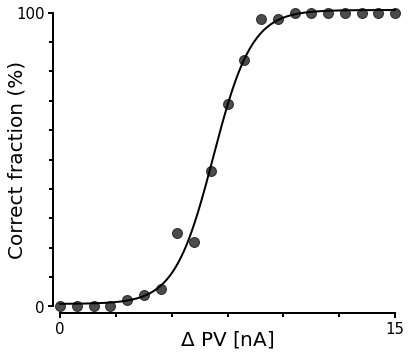

In [449]:
fig1 = plt.figure(figsize=(6, 5.4))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))

ax.plot(mu1_scan_set, choose_pop1, 'ko', alpha=0.7, ms=10, clip_on=False)
ax.plot(plot_x_fit, plot_y_fit, 'k', label='control', clip_on=False)
ax.set_xlabel(r'$\Delta$ PV [nA]', fontsize=20, labelpad=-8)
ax.set_ylabel('Correct fraction (%)', fontsize=20, labelpad=-10)


ax.set_xlim([0, 15])
ax.set_xticks([0, 15])
ax.set_xticklabels([0, 15], fontsize=15)
minorLocator = MultipleLocator(2.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([0, 100])
ax.set_yticks([0, 100])
ax.set_yticklabels([0, 100], fontsize=15)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

# fig1.savefig('Figures/Psychometric_Curve.pdf', bbox_inches = "tight")

In [505]:
pars = default_pars()
pars['Ntrials']=200

mu1_scan_set = np.linspace(10, 20, 11)
delta_mu = 7.5
print('delta PV =', delta_mu)
L_mu1 = len(mu1_scan_set)
corr_frac = np.zeros(L_mu1)

t_rec = {}
for i, mu1 in enumerate(mu1_scan_set):
    pars['mu1'] = mu1
    pars['mu2'] = mu1 - delta_mu
    res = run_sim(pars, verbose=False)

    id_correct = res['r1smooth'][:, -1]>15.
    corr_frac[i] = sum(id_correct)

    t_rec[i] = []
    for j in range(pars['Ntrials']):
      if res['r1smooth'][j, :].max()>15.:
        id_sel = res['r1smooth'][j, :]>15
        t_rec[i].append(pars['range_t'][id_sel][0])

    print(i)

delta PV = 7.5
0
1
2
3
4
5
6
7
8
9
10


In [514]:
print(corr_frac/2)

[92.5 88.  92.  93.5 92.5 92.  88.5 91.  92.5 92.5 92.5]


In [507]:
t_rec_avr = np.zeros(L_mu1)
t_rec_std = np.zeros(L_mu1)
for i in range(L_mu1):
    t_tmp = t_rec[i]
    t_rec_avr[i] = np.mean(t_tmp)
    t_rec_std[i] = np.std(t_tmp)

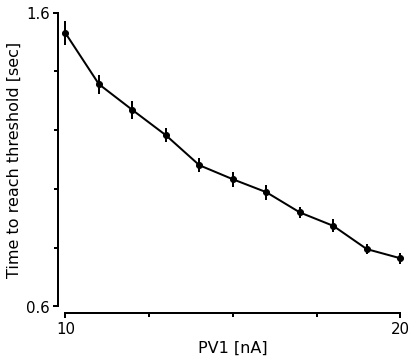

In [522]:
fig1 = plt.figure(figsize=(6, 5.4))
ax = plt.subplot(111)
fig_funs_py3.remove_topright_spines(ax)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_position(  ('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))

ax = plt.subplot(111)
# ax.plot(mu1_scan_set, t_rec_avr-1., 'k-o', ms=10, clip_on=False)
ax.errorbar(mu1_scan_set, t_rec_avr-1., yerr=t_rec_std/10, fmt='k-o', ms=6, clip_on=False)
ax.set_xlabel(r'PV1 [nA]')
ax.set_ylabel('Time to reach threshold [sec]')

ax.set_xlim([10, 20])
ax.set_xticks([10, 20])
ax.set_xticklabels([10, 20], fontsize=15)
minorLocator = MultipleLocator(2.5)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_ylim([.6, 1.6])
ax.set_yticks([.6, 1.6])
ax.set_yticklabels([0.6, 1.6], fontsize=15)
minorLocator = MultipleLocator(0.2)
ax.yaxis.set_minor_locator(minorLocator)

ax.tick_params(axis='both', which='major', size=5., width=2)
ax.tick_params(axis='both', which='minor', size=4., width=2)

fig1.savefig('Figures/ReactionTime-PV1_PreferredInput.pdf', bbox_inches = "tight")

In [156]:
pars = default_pars()
pars['Ntrials']=100
pars['a'] = 300.
pars['b']  = 108. * pars['a']/270.

r_end_gain = np.zeros((L_mu1, pars['Ntrials']))

for i, mu1 in enumerate(mu1_scan_set):
  pars['mu1'] = mu1
  res = run_sim(pars, verbose=False)
  r_end_gain[i, :] = res['r1smooth'][:, 6000:].max(axis=1)

#   print(i)

choose_pop1_gain = (r_end_gain>12).sum(axis=1)

(a_gain, b_gain, c_gain, d_gain), _  = opt.curve_fit(myLogistic, mu1_scan_set, choose_pop1_gain,
                                     p0=[0, 100, 5, 3.], maxfev = 100000)

plot_y_fit_gain = myLogistic(mu1_scan_set, a_gain, b_gain, c_gain, d_gain)

# plt.figure(figsize=(6, 5.4))
# ax = plt.subplot(111)
# ax.plot(mu1_scan_set, choose_pop1, 'bo', alpha=0.7, ms=12)
# ax.plot(mu1_scan_set, plot_y_fit, 'b', label='small gain')

# ax.plot(mu1_scan_set, choose2_pop1, 'ro', alpha=0.7, ms=12)
# ax.plot(mu1_scan_set, plot_y2_fit, 'r', label='large gain')

# ax.set_xlabel(r'$\Delta$ PV')
# ax.set_ylabel('Correct fraction (%)')
# plt.legend()

In [157]:
# perturb JI
pars = default_pars()
pars['Ntrials']=100
pars['JI']  = -0.0497*0.5

r_end_JI = np.zeros((L_mu1, pars['Ntrials']))

for i, mu1 in enumerate(mu1_scan_set):
  pars['mu1'] = mu1
  res = run_sim(pars, verbose=False)
  r_end_JI[i, :] = res['r1smooth'][:, 6000:].max(axis=1)

#   print(i)

choose_pop1_JI = (r_end_JI>12).sum(axis=1)

(a_JI, b_JI, c_JI, d_JI), _  = opt.curve_fit(myLogistic, mu1_scan_set, choose_pop1_JI,
                                             p0=[0, 100, 5, 3.], maxfev = 100000)

plot_y_fit_JI = myLogistic(mu1_scan_set, a_JI, b_JI, c_JI, d_JI)

In [158]:
# perturb Ib
pars = default_pars()
pars['Ntrials']=100
Ib_factor = 1.005
pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor

r_end_Ib = np.zeros((L_mu1, pars['Ntrials']))

for i, mu1 in enumerate(mu1_scan_set):
  pars['mu1'] = mu1
  res = run_sim(pars, verbose=False)
  r_end_Ib[i, :] = res['r1smooth'][:, 6000:].max(axis=1)

#   print(i)

choose_pop1_Ib = (r_end_Ib>12).sum(axis=1)

(a_Ib, b_Ib, c_Ib, d_Ib), _  = opt.curve_fit(myLogistic, mu1_scan_set, choose_pop1_Ib,
                                             p0=[0, 100, 5, 3.], maxfev = 100000)

plot_y_fit_Ib = myLogistic(mu1_scan_set, a_Ib, b_Ib, c_Ib, d_Ib)

In [170]:
# perturb Ib strong
pars = default_pars()
pars['Ntrials']=100
Ib_factor = 1.05
pars['Ib1'], pars['Ib2'] = 0.3255*Ib_factor, 0.3255*Ib_factor

r_end_Ib_s = np.zeros((L_mu1, pars['Ntrials']))

for i, mu1 in enumerate(mu1_scan_set):
  pars['mu1'] = mu1
  res = run_sim(pars, verbose=False)
  r_end_Ib_s[i, :] = res['r1smooth'][:, 6000:].max(axis=1)

#   print(i)

choose_pop1_Ib_s = (r_end_Ib_s>12).sum(axis=1)

(a_Ib_s, b_Ib_s, c_Ib_s, d_Ib_s), _  = opt.curve_fit(myLogistic, mu1_scan_set, choose_pop1_Ib_s,
                                             p0=[0, 100, 5, 3.], maxfev = 100000)

plot_y_fit_Ib_s = myLogistic(mu1_scan_set, a_Ib_s, b_Ib_s, c_Ib_s, d_Ib_s)

In [160]:
# perturb JE
pars = default_pars()
pars['Ntrials']=100
pars['JE'] = 0.2609*1.02

r_end_JE = np.zeros((L_mu1, pars['Ntrials']))

for i, mu1 in enumerate(mu1_scan_set):
  pars['mu1'] = mu1
  res = run_sim(pars, verbose=False)
  r_end_JE[i, :] = res['r1smooth'][:, 6000:].max(axis=1)

#   print(i)

choose_pop1_JE = (r_end_JE>12).sum(axis=1)

(a_JE, b_JE, c_JE, d_JE), _  = opt.curve_fit(myLogistic, mu1_scan_set, choose_pop1_JE,
                                             p0=[0, 100, 5, 3.], maxfev = 100000)

plot_y_fit_JE = myLogistic(mu1_scan_set, a_JE, b_JE, c_JE, d_JE)

In [171]:
# perturb JE strong
pars = default_pars()
pars['Ntrials']=100
pars['JE'] = 0.2609*1.2

r_end_JE_s = np.zeros((L_mu1, pars['Ntrials']))

for i, mu1 in enumerate(mu1_scan_set):
  pars['mu1'] = mu1
  res = run_sim(pars, verbose=False)
  r_end_JE_s[i, :] = res['r1smooth'][:, 6000:].max(axis=1)

#   print(i)

choose_pop1_JE_s = (r_end_JE_s>12).sum(axis=1)

(a_JE_s, b_JE_s, c_JE_s, d_JE_s), _  = opt.curve_fit(myLogistic, mu1_scan_set, choose_pop1_JE_s,
                                             p0=[0, 100, 5, 3.], maxfev = 100000)

plot_y_fit_JE_s = myLogistic(mu1_scan_set, a_JE_s, b_JE_s, c_JE_s, d_JE_s)

In [162]:
# perturb noise
pars = default_pars()
pars['Ntrials']=100
pars['sigma'] = 0.03

r_end_noise = np.zeros((L_mu1, pars['Ntrials']))

for i, mu1 in enumerate(mu1_scan_set):
  pars['mu1'] = mu1
  res = run_sim(pars, verbose=False)
  r_end_noise[i, :] = res['r1smooth'][:, 6000:].max(axis=1)

#   print(i)

choose_pop1_noise = (r_end_noise>12).sum(axis=1)

(a_noise, b_noise, c_noise, d_noise), _  = opt.curve_fit(myLogistic, mu1_scan_set, choose_pop1_noise,
                                             p0=[0, 100, 5, 3.], maxfev = 100000)

plot_y_fit_noise = myLogistic(mu1_scan_set, a_noise, b_noise, c_noise, d_noise)

In [172]:
# perturb noise strong
pars = default_pars()
pars['Ntrials']=100
pars['sigma'] = 0.06

r_end_noise_s = np.zeros((L_mu1, pars['Ntrials']))

for i, mu1 in enumerate(mu1_scan_set):
  pars['mu1'] = mu1
  res = run_sim(pars, verbose=False)
  r_end_noise_s[i, :] = res['r1smooth'][:, 6000:].max(axis=1)

#   print(i)

choose_pop1_noise_s = (r_end_noise_s>12).sum(axis=1)

(a_noise_s, b_noise_s, c_noise_s, d_noise_s), _  = opt.curve_fit(myLogistic, mu1_scan_set, choose_pop1_noise_s,
                                             p0=[0, 100, 5, 3.], maxfev = 100000)

plot_y_fit_noise_s = myLogistic(mu1_scan_set, a_noise_s, b_noise_s, c_noise_s, d_noise_s)

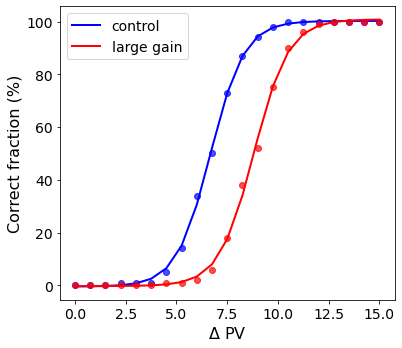

In [164]:
plt.figure(figsize=(6, 5.4))
ax = plt.subplot(111)
ax.plot(mu1_scan_set, choose_pop1, 'bo', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit, 'b', label='control')

ax.plot(mu1_scan_set, choose_pop1_gain, 'ro', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit_gain, 'r', label='large gain')

ax.set_xlabel(r'$\Delta$ PV')
ax.set_ylabel('Correct fraction (%)')
plt.legend()

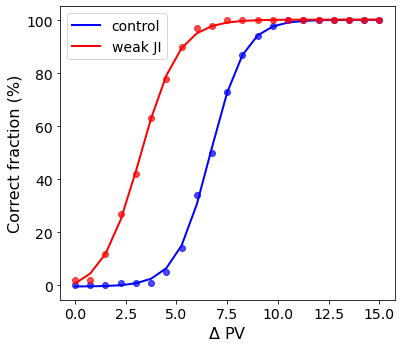

In [165]:
plt.figure(figsize=(6, 5.4))
ax = plt.subplot(111)
ax.plot(mu1_scan_set, choose_pop1, 'bo', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit, 'b', label='control')

ax.plot(mu1_scan_set, choose_pop1_JI, 'ro', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit_JI, 'r', label='weak JI')

ax.set_xlabel(r'$\Delta$ PV')
ax.set_ylabel('Correct fraction (%)')
plt.legend()

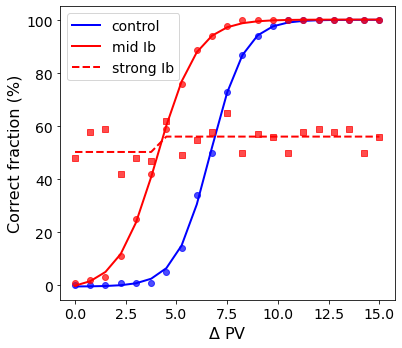

In [173]:
plt.figure(figsize=(6, 5.4))
ax = plt.subplot(111)
ax.plot(mu1_scan_set, choose_pop1, 'bo', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit, 'b', label='control')

ax.plot(mu1_scan_set, choose_pop1_Ib, 'ro', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit_Ib, 'r', label='mid Ib')

ax.plot(mu1_scan_set, choose_pop1_Ib_s, 'rs', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit_Ib_s, 'r--', label='strong Ib')

ax.set_xlabel(r'$\Delta$ PV')
ax.set_ylabel('Correct fraction (%)')
plt.legend()

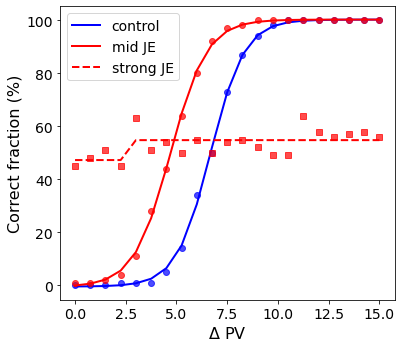

In [174]:
plt.figure(figsize=(6, 5.4))
ax = plt.subplot(111)
ax.plot(mu1_scan_set, choose_pop1, 'bo', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit, 'b', label='control')

ax.plot(mu1_scan_set, choose_pop1_JE, 'ro', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit_JE, 'r', label='mid JE')

ax.plot(mu1_scan_set, choose_pop1_JE_s, 'rs', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit_JE_s, 'r--', label='strong JE')

ax.set_xlabel(r'$\Delta$ PV')
ax.set_ylabel('Correct fraction (%)')
plt.legend()

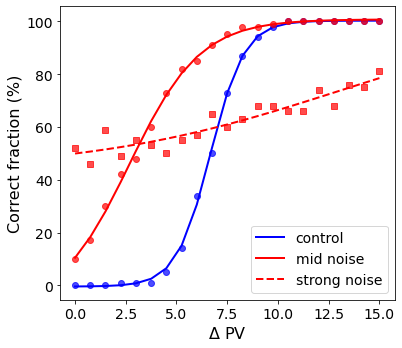

In [175]:
plt.figure(figsize=(6, 5.4))
ax = plt.subplot(111)
ax.plot(mu1_scan_set, choose_pop1, 'bo', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit, 'b', label='control')

ax.plot(mu1_scan_set, choose_pop1_noise, 'ro', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit_noise, 'r', label='mid noise')

ax.plot(mu1_scan_set, choose_pop1_noise_s, 'rs', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit_noise_s, 'r--', label='strong noise')

ax.set_xlabel(r'$\Delta$ PV')
ax.set_ylabel('Correct fraction (%)')
plt.legend()

In [180]:
# perturb noise strong
pars = default_pars()
pars['Ntrials']=100
pars['sigma'] = 0.06
pars['JI']  = -0.0497*.8

r_end_noise_JI = np.zeros((L_mu1, pars['Ntrials']))

for i, mu1 in enumerate(mu1_scan_set):
  pars['mu1'] = mu1
  res = run_sim(pars, verbose=False)
  r_end_noise_JI[i, :] = res['r1smooth'][:, 6000:].max(axis=1)

#   print(i)

choose_pop1_noise_JI = (r_end_noise_JI>12).sum(axis=1)

(a_noise_JI, b_noise_JI, c_noise_JI, d_noise_JI), _  = opt.curve_fit(myLogistic, mu1_scan_set, choose_pop1_noise_JI,
                                                                     p0=[0, 100, 5, 3.], maxfev = 100000)

plot_y_fit_noise_JI = myLogistic(mu1_scan_set, a_noise_JI, b_noise_JI, c_noise_JI, d_noise_s)

In [181]:
plt.figure(figsize=(6, 5.4))
ax = plt.subplot(111)
ax.plot(mu1_scan_set, choose_pop1, 'bo', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit, 'b', label='control')

ax.plot(mu1_scan_set, choose_pop1_noise_s, 'rs', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit_noise_s, 'r--', label='Add noise')

ax.plot(mu1_scan_set, choose_pop1_noise_JI, 'ro', alpha=0.7, ms=6)
ax.plot(mu1_scan_set, plot_y_fit_noise_JI, 'r', label='Add noise, increase JI')

ax.set_xlabel(r'$\Delta$ PV')
ax.set_ylabel('Correct fraction (%)')
plt.legend()